### Problem statement: What are the features to be included in the new pricing survey
- Current survey requires 81 inputs from consumers
- Find the most opt features to get inputs from them

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from dython.nominal import associations
from sklearn.feature_selection import RFE

plt.style.use('bmh')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

df_train = pd.read_csv('../dataset/train.csv')
df_test = pd.read_csv('../dataset/test.csv')

### EDA  and Data Cleaning
- All steps done in df_train dataset will be done on df_test dataset at the same time to ensure that they have the same number of columns (excluding SalePrice) during modeling and testing.
- Dataset Description [download here](./datasets/data_description.xlsx) 

In [7]:
df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [8]:
df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

The cheapest house sold for $12,789 and the most expensive for $611,657
The average sales price is $181,470, while median is $162,500


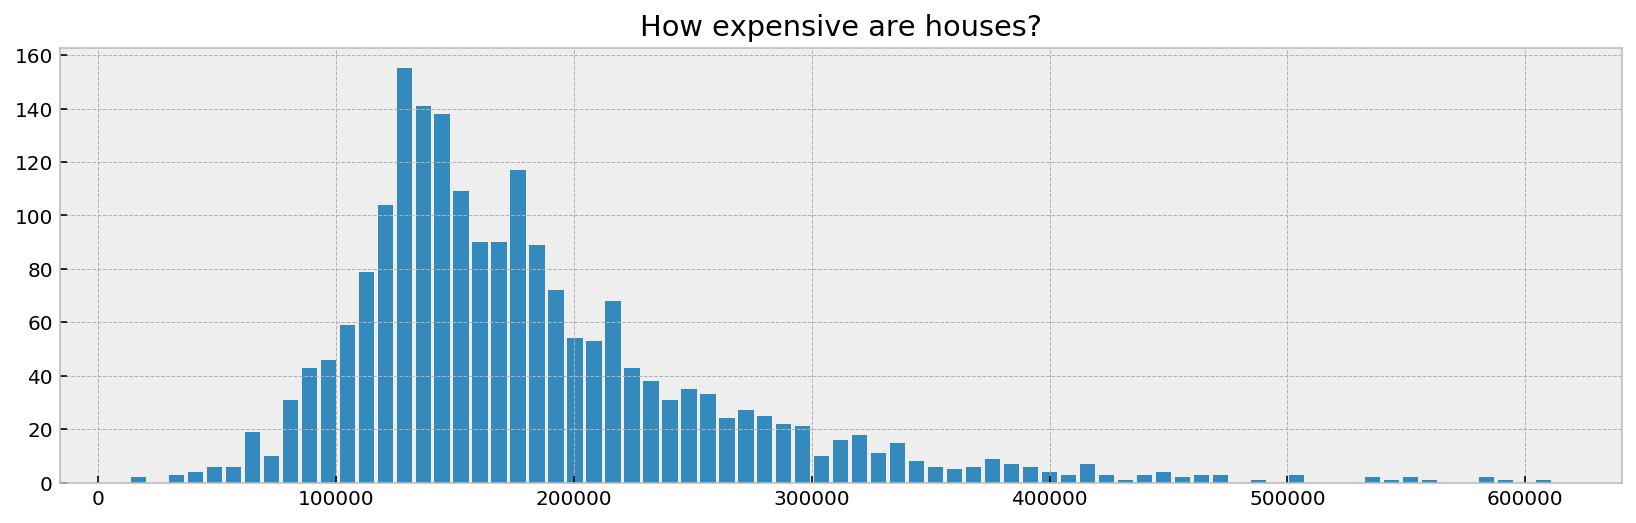

In [9]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df_train.SalePrice.min(), df_train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df_train.SalePrice.mean(), df_train.SalePrice.median()))
df_train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

### Handling Null Values

In [5]:
def find_null(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:        
            print(f'{null_values}: {df_null_values} null values')
find_null(df_train)

Lot Frontage: 330 null values
Alley: 1911 null values
Mas Vnr Type: 22 null values
Mas Vnr Area: 22 null values
Bsmt Qual: 55 null values
Bsmt Cond: 55 null values
Bsmt Exposure: 58 null values
BsmtFin Type 1: 55 null values
BsmtFin SF 1: 1 null values
BsmtFin Type 2: 56 null values
BsmtFin SF 2: 1 null values
Bsmt Unf SF: 1 null values
Total Bsmt SF: 1 null values
Bsmt Full Bath: 2 null values
Bsmt Half Bath: 2 null values
Fireplace Qu: 1000 null values
Garage Type: 113 null values
Garage Yr Blt: 114 null values
Garage Finish: 114 null values
Garage Cars: 1 null values
Garage Area: 1 null values
Garage Qual: 114 null values
Garage Cond: 114 null values
Pool QC: 2042 null values
Fence: 1651 null values
Misc Feature: 1986 null values


In [6]:
find_null(df_test)

Lot Frontage: 160 null values
Alley: 821 null values
Mas Vnr Type: 1 null values
Mas Vnr Area: 1 null values
Bsmt Qual: 25 null values
Bsmt Cond: 25 null values
Bsmt Exposure: 25 null values
BsmtFin Type 1: 25 null values
BsmtFin Type 2: 25 null values
Electrical: 1 null values
Fireplace Qu: 422 null values
Garage Type: 44 null values
Garage Yr Blt: 45 null values
Garage Finish: 45 null values
Garage Qual: 45 null values
Garage Cond: 45 null values
Pool QC: 875 null values
Fence: 707 null values
Misc Feature: 838 null values


We can remove features with more than 80% null values, as the machine will not learn much from these values we are also unable to merge them with other columns

In [7]:
for missing_values in df_train:
    if df_train[missing_values].isnull().sum()/ df_train.index.shape[0] > 0.8:
        df_train.drop(columns=missing_values, inplace = True)
        

In [8]:
for missing_values in df_test:
    if df_test[missing_values].isnull().sum()/ df_test.index.shape[0] > 0.8:
        df_test.drop(columns=missing_values, inplace = True)

In [9]:
df_train.shape

(2051, 77)

In [10]:
df_test.shape

(879, 76)

We will remove Lot Frontage (with 330 null values) as with research, it is included in lot area, and we do not want to manipulate these empty cells which might cause confusion later. 

In [11]:
df_train.drop(columns = 'Lot Frontage', inplace=True)
df_train.shape

(2051, 76)

In [12]:
df_test.drop(columns = 'Lot Frontage', inplace=True)
df_test.shape

(879, 75)

We have 55 null values for Bsmt Qual, Bsmt Cond, BsmtFin Type 1, BsmtFin Type 2, most of them have SF = 0 in the same row, we can then assume that they have No Basement.

In [13]:
df_train[df_train['Bsmt Qual'].isnull()].head()

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
12    807  906226060           70        RL     26400   Pave       Reg   
93    811  906226100           90        RL      7018   Pave       Reg   
114   781  905228050           20        RL      9000   Pave       Reg   
146   888  908128060           85        RL      7301   Pave       Reg   
183  1554  910251050           20   A (agr)     14584   Pave       Reg   

    Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
12           Bnk    AllPub        FR2        Gtl      SawyerW       Feedr   
93           Bnk    AllPub     Inside        Gtl      SawyerW        Norm   
114          Lvl    AllPub     Corner        Gtl       Sawyer        Norm   
146          Lvl    AllPub     Corner        Gtl      Edwards        Norm   
183          Low    AllPub     Inside        Mod       IDOTRR        Norm   

    Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
12         Norm      1Fam      2Story             5             7        1880   
93         Norm    Duplex      1Story             5             5        1979   
114        Norm      1Fam      1Story             2             2        1947   
146        Norm      1Fam      SFoyer             7             5        2003   
183        Norm      1Fam      1Story             1             5        1952   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
12             2007      Gable   CompShg      HdBoard      HdBoard   
93             1979      Gable   CompShg      HdBoard      HdBoard   
114            1950      Gable   CompShg      Wd Sdng      Wd Sdng   
146            2003      Gable   CompShg      HdBoard      HdBoard   
183            1952      Gable   CompShg      AsbShng      VinylSd   

    Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
12          None           0.0         Gd         TA      PConc       NaN   
93          None           0.0         TA         TA       Slab       NaN   
114         None           0.0         TA         TA       Slab       NaN   
146      BrkFace         500.0         Gd         TA       Slab       NaN   
183         None           0.0         Fa         Po       Slab       NaN   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
12        NaN           NaN            NaN           0.0            NaN   
93        NaN           NaN            NaN           0.0            NaN   
114       NaN           NaN            NaN           0.0            NaN   
146       NaN           NaN            NaN           0.0            NaN   
183       NaN           NaN            NaN           0.0            NaN   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
12            0.0          0.0            0.0    GasA         Ex           Y   
93            0.0          0.0            0.0    GasA         TA           Y   
114           0.0          0.0            0.0    GasA         Fa           N   
146           0.0          0.0            0.0    GasA         Ex           Y   
183           0.0          0.0            0.0    Wall         Po           N   

    Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
12       SBrkr        1288         728                0         2016   
93       SBrkr        1535           0                0         1535   
114      SBrkr         660           0                0          660   
146      SBrkr         495        1427                0         1922   
183      FuseA         733           0                0          733   

     Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
12              0.0             0.0          1          0              4   
93              0.0             0.0          2          0              4   
114             0.0             0.0          1          0              2   
146             0.0             0.0          3          0  

In [14]:
print(df_train.loc[:,'Bsmt Qual':'Total Bsmt SF'].isnull().sum())

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
dtype: int64


In [15]:
df_train['Bsmt Qual'].fillna('No Basement', inplace=True)
df_train['Bsmt Cond'].fillna('No Basement', inplace=True)
df_train['Bsmt Exposure'].fillna('No Basement', inplace=True)
df_train['BsmtFin Type 1'].fillna('No Basement', inplace=True)
df_train['BsmtFin Type 2'].fillna('No Basement', inplace=True)

df_train['BsmtFin SF 1'].fillna(0, inplace=True)
df_train['BsmtFin SF 2'].fillna(0, inplace=True)
df_train['Bsmt Unf SF'].fillna(0, inplace=True)
df_train['Total Bsmt SF'].fillna(0, inplace=True)


In [16]:
print(df_test.loc[:,'Bsmt Qual':'Total Bsmt SF'].isnull().sum())

Bsmt Qual         25
Bsmt Cond         25
Bsmt Exposure     25
BsmtFin Type 1    25
BsmtFin SF 1       0
BsmtFin Type 2    25
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
dtype: int64


In [17]:
df_test['Bsmt Qual'].fillna('No Basement', inplace=True)
df_test['Bsmt Cond'].fillna('No Basement', inplace=True)
df_test['Bsmt Exposure'].fillna('No Basement', inplace=True)
df_test['BsmtFin Type 1'].fillna('No Basement', inplace=True)
df_test['BsmtFin Type 2'].fillna('No Basement', inplace=True)

In [18]:
find_null(df_train)

Mas Vnr Type: 22 null values
Mas Vnr Area: 22 null values
Bsmt Full Bath: 2 null values
Bsmt Half Bath: 2 null values
Fireplace Qu: 1000 null values
Garage Type: 113 null values
Garage Yr Blt: 114 null values
Garage Finish: 114 null values
Garage Cars: 1 null values
Garage Area: 1 null values
Garage Qual: 114 null values
Garage Cond: 114 null values


In [19]:
find_null(df_test)

Mas Vnr Type: 1 null values
Mas Vnr Area: 1 null values
Electrical: 1 null values
Fireplace Qu: 422 null values
Garage Type: 44 null values
Garage Yr Blt: 45 null values
Garage Finish: 45 null values
Garage Qual: 45 null values
Garage Cond: 45 null values


Fuill 'NA' in Fireplace Qu with 'No Fireplace' as per the data dictionary

In [20]:
df_train['Fireplace Qu'].fillna('No Fireplace', inplace=True)

In [21]:
df_test['Fireplace Qu'].fillna('No Fireplace', inplace=True)

Fill Bsmt Full Bath and Bsmt Half Bath with 0 values as there's 'No Baseement' in that row

In [22]:
df_train[df_train['Bsmt Full Bath'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
616   1498  908154080           20        RL     47007   Pave       IR1   
1327  1342  903230120           20        RM      5940   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
616           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
1327          Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
616         Norm      1Fam      1Story             5             7   
1327        Norm      1Fam      1Story             4             7   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
616         1959            1996      Gable   CompShg      Plywood   
1327        1946            1950      Gable   CompShg      MetalSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
616       Plywood         None           0.0         TA         TA       Slab   
1327       CBlock         None           0.0         TA         TA      PConc   

        Bsmt Qual    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
616   No Basement  No Basement   No Basement    No Basement           0.0   
1327  No Basement  No Basement   No Basement    No Basement           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
616     No Basement           0.0          0.0            0.0    GasA   
1327    No Basement           0.0          0.0            0.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
616          TA           Y      SBrkr        3820           0   
1327         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
616                 0         3820             NaN             NaN          3   
1327                0          896             NaN             NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
616           1              5              1           Ex             11   
1327          0              2              1           TA              4   

     Functional  Fireplaces  Fireplace Qu Garage Type  Garage Yr Blt  \
616         Typ           2            Gd      Attchd         1959.0   
1327        Typ           0  No Fireplace      Detchd         1946.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
616            Unf          2.0        624.0          TA          TA   
1327           Unf          1.0        280.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
616            Y             0            372               0           0   
1327           Y             0              0               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
616              0          0         0        7     2008       WD      284700  
1327             0          0         0        4     2008     ConLD      79000

In [23]:
df_train['Bsmt Full Bath'].fillna(0, inplace=True)
df_train['Bsmt Half Bath'].fillna(0, inplace=True)

In [24]:
find_null(df_train)

Mas Vnr Type: 22 null values
Mas Vnr Area: 22 null values
Garage Type: 113 null values
Garage Yr Blt: 114 null values
Garage Finish: 114 null values
Garage Cars: 1 null values
Garage Area: 1 null values
Garage Qual: 114 null values
Garage Cond: 114 null values


We have one column with a Garage Type of Detached from home, but without other values, therefore the row will be dropped as we cannot deduce most of the variables from the dataset.

In [25]:
df_train[(df_train['Garage Type'].isnull() == False) & (df_train['Garage Finish'].isnull() == True)]


Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
1712  2237  910201180           70        RM      9060   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1712          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1712        Norm      1Fam      2Story             5             6   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1712        1923            1999      Gable   CompShg      Wd Sdng   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1712      Plywood         None           0.0         TA         TA     BrkTil   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1712        Gd        TA            No            ALQ         548.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1712            Unf           0.0        311.0          859.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1712         Ex           Y      SBrkr         942         886   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1712                0         1828             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1712          0              3              1           Gd              6   

     Functional  Fireplaces  Fireplace Qu Garage Type  Garage Yr Blt  \
1712        Typ           0  No Fireplace      Detchd            NaN   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1712           NaN          NaN          NaN         NaN         NaN   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1712           Y           174              0             212           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
1712             0          0         0        3     2007       WD      150909

In [26]:
gar_mask = df_train[(df_train['Garage Type'].isnull() == False) & (df_train['Garage Finish'].isnull() == True)].index
df_train.drop(gar_mask, inplace=True)
df_train.shape

(2050, 76)

Those with Garage Finish - NA (No garage) are also the ones with Garage Yr Blt, Garage Qual, Garage Cond - NA, therefore we can replace all NAs with No garage   

And replace Garage year built with the year built, changing it to an integer as well so we would not have a decimal place behind it (year)

In [27]:
df_train['Garage Finish'].fillna('No Garage', inplace=True)
df_train['Garage Type'].fillna('No Garage', inplace=True)
df_train['Garage Cond'].fillna('No Garage', inplace=True)
df_train['Garage Qual'].fillna('No Garage', inplace=True)

df_train['Garage Cars'].fillna(0, inplace=True)
df_train['Garage Area'].fillna(0, inplace=True)
df_train['Garage Yr Blt'].fillna(df_train['Year Built'], inplace=True)
df_train['Garage Yr Blt'].astype('int64')
find_null(df_train)

Mas Vnr Type: 22 null values
Mas Vnr Area: 22 null values


In [28]:
df_test['Garage Finish'].fillna('No Garage', inplace=True)
df_test['Garage Type'].fillna('No Garage', inplace=True)
df_test['Garage Cond'].fillna('No Garage', inplace=True)
df_test['Garage Qual'].fillna('No Garage', inplace=True)
df_test['Garage Yr Blt'].fillna(df_test['Year Built'], inplace=True)
df_test['Garage Yr Blt'].astype('int64')
find_null(df_test)

Mas Vnr Type: 1 null values
Mas Vnr Area: 1 null values
Electrical: 1 null values


We assume that for Mas Vnr Type and Mas Vnr Area that are both empty to be houses with no Masonry veneer therefore we can replace them with None and 0 respectively.

In [29]:
df_train['Mas Vnr Type'].fillna('None', inplace=True)
df_train['Mas Vnr Area'].fillna(0, inplace=True)
find_null(df_train)

In [30]:
df_test['Mas Vnr Type'].fillna('None', inplace=True)
df_test['Mas Vnr Area'].fillna(0, inplace=True)
find_null(df_test)

Electrical: 1 null values


As there's no house with no Electrical, we will replace the empty cell with the mode of the column.

In [31]:
df_test[df_test['Electrical'].isnull() == True]

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
635  1578  916386080           80        RL      9735   Pave       Reg   

    Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
635          Lvl    AllPub     Inside        Gtl       Timber        Norm   

    Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
635        Norm      1Fam        SLvl             5             5        2006   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
635            2007      Gable   CompShg      VinylSd      VinylSd   

    Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
635         None           0.0         TA         TA      PConc        Gd   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
635        TA            No            Unf             0            Unf   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
635             0          384            384    GasA         Gd           Y   

    Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
635        NaN         754         640                0         1394   

     Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
635               0               0          2          1              3   

     Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
635              1           Gd              7        Typ           0   

     Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
635  No Fireplace     BuiltIn         2007.0           Fin            2   

     Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
635          400          TA          TA           Y           100   

     Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
635              0               0           0             0          0   

     Misc Val  Mo Sold  Yr Sold Sale Type  
635         0        5     2008       WD

In [32]:
df_test['Electrical'].mode()

0    SBrkr
dtype: object

In [33]:
df_test.at[[635],'Electrical'] = 'SBrkr'

In [34]:
print(find_null(df_test))

None


### Dealing with Zero values

In [35]:
def get_zero(df):
    for zero_values in df:
        df_zero_values = (df[zero_values] == 0).sum()
        if df_zero_values != 0:        
            print(f'{zero_values}: {df_zero_values} Zeros')
get_zero(df_train)

Mas Vnr Area: 1237 Zeros
BsmtFin SF 1: 658 Zeros
BsmtFin SF 2: 1803 Zeros
Bsmt Unf SF: 166 Zeros
Total Bsmt SF: 55 Zeros
2nd Flr SF: 1191 Zeros
Low Qual Fin SF: 2017 Zeros
Bsmt Full Bath: 1201 Zeros
Bsmt Half Bath: 1924 Zeros
Full Bath: 8 Zeros
Half Bath: 1307 Zeros
Bedroom AbvGr: 5 Zeros
Kitchen AbvGr: 2 Zeros
Fireplaces: 999 Zeros
Garage Cars: 113 Zeros
Garage Area: 113 Zeros
Wood Deck SF: 1075 Zeros
Open Porch SF: 911 Zeros
Enclosed Porch: 1724 Zeros
3Ssn Porch: 2024 Zeros
Screen Porch: 1869 Zeros
Pool Area: 2041 Zeros
Misc Val: 1985 Zeros


In [36]:
get_zero(df_test)

Mas Vnr Area: 533 Zeros
BsmtFin SF 1: 273 Zeros
BsmtFin SF 2: 775 Zeros
Bsmt Unf SF: 79 Zeros
Total Bsmt SF: 25 Zeros
2nd Flr SF: 487 Zeros
Low Qual Fin SF: 872 Zeros
Bsmt Full Bath: 507 Zeros
Bsmt Half Bath: 830 Zeros
Full Bath: 4 Zeros
Half Bath: 535 Zeros
Bedroom AbvGr: 3 Zeros
Kitchen AbvGr: 1 Zeros
Fireplaces: 422 Zeros
Garage Cars: 44 Zeros
Garage Area: 44 Zeros
Wood Deck SF: 451 Zeros
Open Porch SF: 388 Zeros
Enclosed Porch: 747 Zeros
3Ssn Porch: 868 Zeros
Screen Porch: 804 Zeros
Pool Area: 875 Zeros
Misc Val: 841 Zeros


We can see that there are 5 rows with None as Mas Vnr Type but has values of not 0, therefore we should change those values to 0 instead.

In [37]:
df_train[(df_train['Mas Vnr Type'] == 'None') & (df_train['Mas Vnr Area'] != 0)]

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
765   1862  533352075           90        RL     18890   Pave       IR1   
810   2529  534129230           60        RL     10400   Pave       Reg   
1148  1914  535106140           20        RL     10150   Pave       Reg   
1684  2004  902427140           20        RM      8626   Pave       Reg   
1832   364  527166010           60        RL     10762   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
765           Lvl    AllPub     Inside        Gtl       Sawyer       Feedr   
810           Lvl    AllPub     Inside        Gtl       NWAmes        Norm   
1148          Lvl    AllPub     Inside        Gtl        NAmes       Feedr   
1684          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1832          Lvl    AllPub    CulDSac        Gtl      Gilbert        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
765         RRAe    Duplex      1.5Fin             5             5   
810         Norm      1Fam      2Story             6             5   
1148        Norm      1Fam      1Story             5             5   
1684        Norm      1Fam      1Story             4             6   
1832        Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
765         1977            1977       Shed   CompShg      Plywood   
810         1972            1972      Gable   CompShg      VinylSd   
1148        1958            1958      Gable   CompShg      Wd Sdng   
1684        1956            1956      Gable   CompShg      MetalSd   
1832        1999            1999      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
765       Plywood         None           1.0         TA         TA     CBlock   
810       VinylSd         None         288.0         TA         TA     CBlock   
1148      Wd Sdng         None           1.0         TA         TA     CBlock   
1684      MetalSd         None           1.0         TA         TA     CBlock   
1832      VinylSd         None         344.0         Gd         TA      PConc   

        Bsmt Qual    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
765            Gd           TA            No            GLQ         498.0   
810            TA           TA            No            Rec         247.0   
1148           TA           TA            No            Rec         456.0   
1684  No Basement  No Basement   No Basement    No Basement           0.0   
1832           Gd           TA            No            GLQ         694.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
765             Rec         211.0        652.0         1361.0    GasA   
810             Unf           0.0        485.0          732.0    GasA   
1148            Unf           0.0        456.0          912.0    GasA   
1684    No Basement           0.0          0.0            0.0    GasA   
1832            Unf           0.0        284.0          978.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
765          Ex           Y      SBrkr        1361        1259   
810          Gd           Y      SBrkr        1012         778   
1148         Ex           Y      FuseA         912           0   
1684         Gd           Y      SBrkr         968           0   
1832         Ex           Y      SBrkr        1005         978   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
765                 0         2620             0.0             0.0          2   
810                 0         1790             1.0             0.0          1   
1148                0          912             0.0             0.0          1   
1684                0          968             0.0             0.0          1   
1832                0         1983             0.0     

In [38]:
df_train.loc[[765,810,1148,1684,1832],['Mas Vnr Type','Mas Vnr Area']] 

Mas Vnr Type  Mas Vnr Area
765          None           1.0
810          None         288.0
1148         None           1.0
1684         None           1.0
1832         None         344.0

In [39]:
df_train.at[[765,810,1148, 1684, 1832],'Mas Vnr Area']=0

In [40]:
print(df_test['Mas Vnr Type'].value_counts())
df_test[(df_test['Mas Vnr Type'] == 'None') & (df_test['Mas Vnr Area'] != 0)]

None       535
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64


Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
383  442  528138010           20        RL     13514   Pave       IR1   
863  404  527451110          160        RM      2368   Pave       Reg   

    Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
383          Lvl    AllPub     Corner        Gtl      NridgHt        Norm   
863          Lvl    AllPub     Inside        Gtl       BrDale        Norm   

    Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
383        Norm      1Fam      1Story             9             5        2008   
863        Norm    TwnhsE      2Story             5             6        1970   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
383            2008        Hip   CompShg      VinylSd      VinylSd   
863            1970      Gable   CompShg      HdBoard      HdBoard   

    Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
383         None         285.0         Ex         TA      PConc        Ex   
863         None         312.0         TA         TA     CBlock        TA   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
383        TA            No            GLQ          1142            Unf   
863        TA            No            LwQ           765            Unf   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
383             0          632           1774    GasA         Ex           Y   
863             0            0            765    GasA         TA           Y   

    Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
383      SBrkr        1808           0                0         1808   
863      SBrkr         765         600                0         1365   

     Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
383               1               0          2          0              3   
863               0               0          1          1              3   

     Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
383              1           Ex              7        Typ           1   
863              1           TA              7       Min1           0   

     Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
383            Gd      Attchd         2008.0           Fin            3   
863  No Fireplace      Attchd         1970.0           Unf            2   

     Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
383          850          TA          TA           Y           200   
863          440          TA          TA           Y             0   

     Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
383             26               0           0             0          0   
863             36               0           0             0          0   

     Misc Val  Mo Sold  Yr Sold Sale Type  
383         0        3     2009       WD   
863         0        5     2009       WD

In [41]:
df_test.at[[383,863],'Mas Vnr Area']=0

Now we have 1242 cells with zeros in Mas Vnr Area but only 1239 None in Mas Vnr Type

In [42]:
print(df_train['Mas Vnr Type'].value_counts())
get_zero(df_train)

None       1239
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64
Mas Vnr Area: 1242 Zeros
BsmtFin SF 1: 658 Zeros
BsmtFin SF 2: 1803 Zeros
Bsmt Unf SF: 166 Zeros
Total Bsmt SF: 55 Zeros
2nd Flr SF: 1191 Zeros
Low Qual Fin SF: 2017 Zeros
Bsmt Full Bath: 1201 Zeros
Bsmt Half Bath: 1924 Zeros
Full Bath: 8 Zeros
Half Bath: 1307 Zeros
Bedroom AbvGr: 5 Zeros
Kitchen AbvGr: 2 Zeros
Fireplaces: 999 Zeros
Garage Cars: 113 Zeros
Garage Area: 113 Zeros
Wood Deck SF: 1075 Zeros
Open Porch SF: 911 Zeros
Enclosed Porch: 1724 Zeros
3Ssn Porch: 2024 Zeros
Screen Porch: 1869 Zeros
Pool Area: 2041 Zeros
Misc Val: 1985 Zeros


There are 3 cells with not None for Mas Vnr Type but 0 area, we can replace them with the mean value of the Mas Vnr Area column

In [43]:
df_train[(df_train['Mas Vnr Type'] != 'None') & (df_train['Mas Vnr Area'] == 0)]

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
669   1741  528222090           20        RL      7697   Pave       Reg   
1136  1641  527252070           20        RL      8089   Pave       Reg   
1187  1786  528435060           20        RL      9849   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
669           Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
1136          HLS    AllPub     Inside        Gtl      StoneBr        Norm   
1187          Lvl    AllPub     Inside        Gtl      Somerst        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
669         Norm      1Fam      1Story             7             6   
1136        Norm      1Fam      1Story             8             6   
1187        Norm      1Fam      1Story             7             6   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
669         2007            2007      Gable   CompShg      VinylSd   
1136        2007            2007      Gable   CompShg      MetalSd   
1187        2007            2007        Hip   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
669       VinylSd      BrkFace           0.0         Gd         TA      PConc   
1136      MetalSd      BrkFace           0.0         Gd         TA      PConc   
1187      VinylSd        Stone           0.0         Gd         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
669         Gd        TA            No            Unf           0.0   
1136        Gd        TA            Av            GLQ         945.0   
1187        Gd        TA            Av            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
669             Unf           0.0       1246.0         1246.0    GasA   
1136            Unf           0.0        474.0         1419.0    GasA   
1187            Unf           0.0       1689.0         1689.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
669          Ex           Y      SBrkr        1258           0   
1136         Ex           Y      SBrkr        1419           0   
1187         Ex           Y      SBrkr        1689           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
669                 0         1258             0.0             0.0          2   
1136                0         1419             1.0             0.0          2   
1187                0         1689             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
669           0              3              1           Gd              6   
1136          0              2              1           Gd              7   
1187          0              3              1           Gd              7   

     Functional  Fireplaces  Fireplace Qu Garage Type  Garage Yr Blt  \
669         Typ           0  No Fireplace      Attchd         2007.0   
1136        Typ           1            Gd      Attchd         2007.0   
1187        Typ           0  No Fireplace      Attchd         2007.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
669            RFn          2.0        462.0          TA          TA   
1136           RFn          2.0        567.0          TA          TA   
1187           RFn          3.0        954.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
669            Y             0              0               0           0   
1136           Y           140              0               0           0   
1187           Y             0             56               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
669              0          0         0        8     2007     

In [44]:
df_train.at[[669,1136,1187],'Mas Vnr Area']= df_train['Mas Vnr Area'].mean()

There's one column with BsmtFin Type 2 = No Basement but with Basement SF of 479, so we can drop it as this data makes no sense.

In [45]:
df_train[(df_train['BsmtFin Type 2'] == 'No Basement') & (df_train['BsmtFin SF 2'] != 0)]


Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
1147  445  528142130           20        RL     10655   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1147          Lvl    AllPub     Inside        Gtl      NridgHt        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1147        Norm      1Fam      1Story             8             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1147        2003            2004      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1147      VinylSd      BrkFace         296.0         Gd         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1147        Gd        TA            No            GLQ        1124.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1147    No Basement         479.0       1603.0         3206.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1147         Ex           Y      SBrkr        1629           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1147                0         1629             1.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1147          0              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1147        Typ           1           Gd      Attchd         2003.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1147           RFn          3.0        880.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1147           Y             0              0               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
1147             0          0         0       10     2009       WD      284000

In [46]:
bsmt_mask = df_train[(df_train['BsmtFin Type 2'] == 'No Basement') & (df_train['BsmtFin SF 2'] != 0)].index
df_train.drop(bsmt_mask, inplace=True)
df_train.shape

(2049, 76)

#### We have quite a few zero values left, we should see if we can minimize them by merging related columns to form a new column   
We are going to add a few columns:
- Remodeled Y/N
- Age when Sold
- Garage Age when sold   

We will be deleting away the columns we used below
- Year Remod/Add
- Yr Sold
- Garage Yr Blt
- Year Built
- Also deleting Month Sold as it is not a significant feature after dropping year built

In [47]:
#year renovated - Y if year renovated == year built else N 
df_train['Remodeled Y/N'] = np.where(df_train['Year Remod/Add'] ==df_train['Year Built'], 'No', 'Yes')
df_train['Age when Sold'] = df_train['Yr Sold'] - df_train['Year Built']
df_train['Garage Age when sold'] = (df_train['Yr Sold'] - df_train['Garage Yr Blt']).astype('int64')

In [48]:
df_train.drop(columns = ['Year Remod/Add', 'Yr Sold', 'Mo Sold', 'Year Built', 'Garage Yr Blt'], inplace= True)
df_train.shape

(2049, 74)

In [49]:
df_test['Remodeled Y/N'] = np.where(df_test['Year Remod/Add'] ==df_test['Year Built'], 'No', 'Yes')
df_test['Age when Sold'] = df_test['Yr Sold'] - df_test['Year Built']
df_test['Garage Age when sold'] = (df_test['Yr Sold'] - df_test['Garage Yr Blt']).astype('int64')

In [50]:
df_test.drop(columns = ['Year Remod/Add', 'Yr Sold', 'Mo Sold', 'Year Built', 'Garage Yr Blt'], inplace= True)
df_test.shape

(879, 73)

Checking the relation between Gr Liv Area vs 1st Flr SF, 2nd Flr SF and Low Qual Fin SF

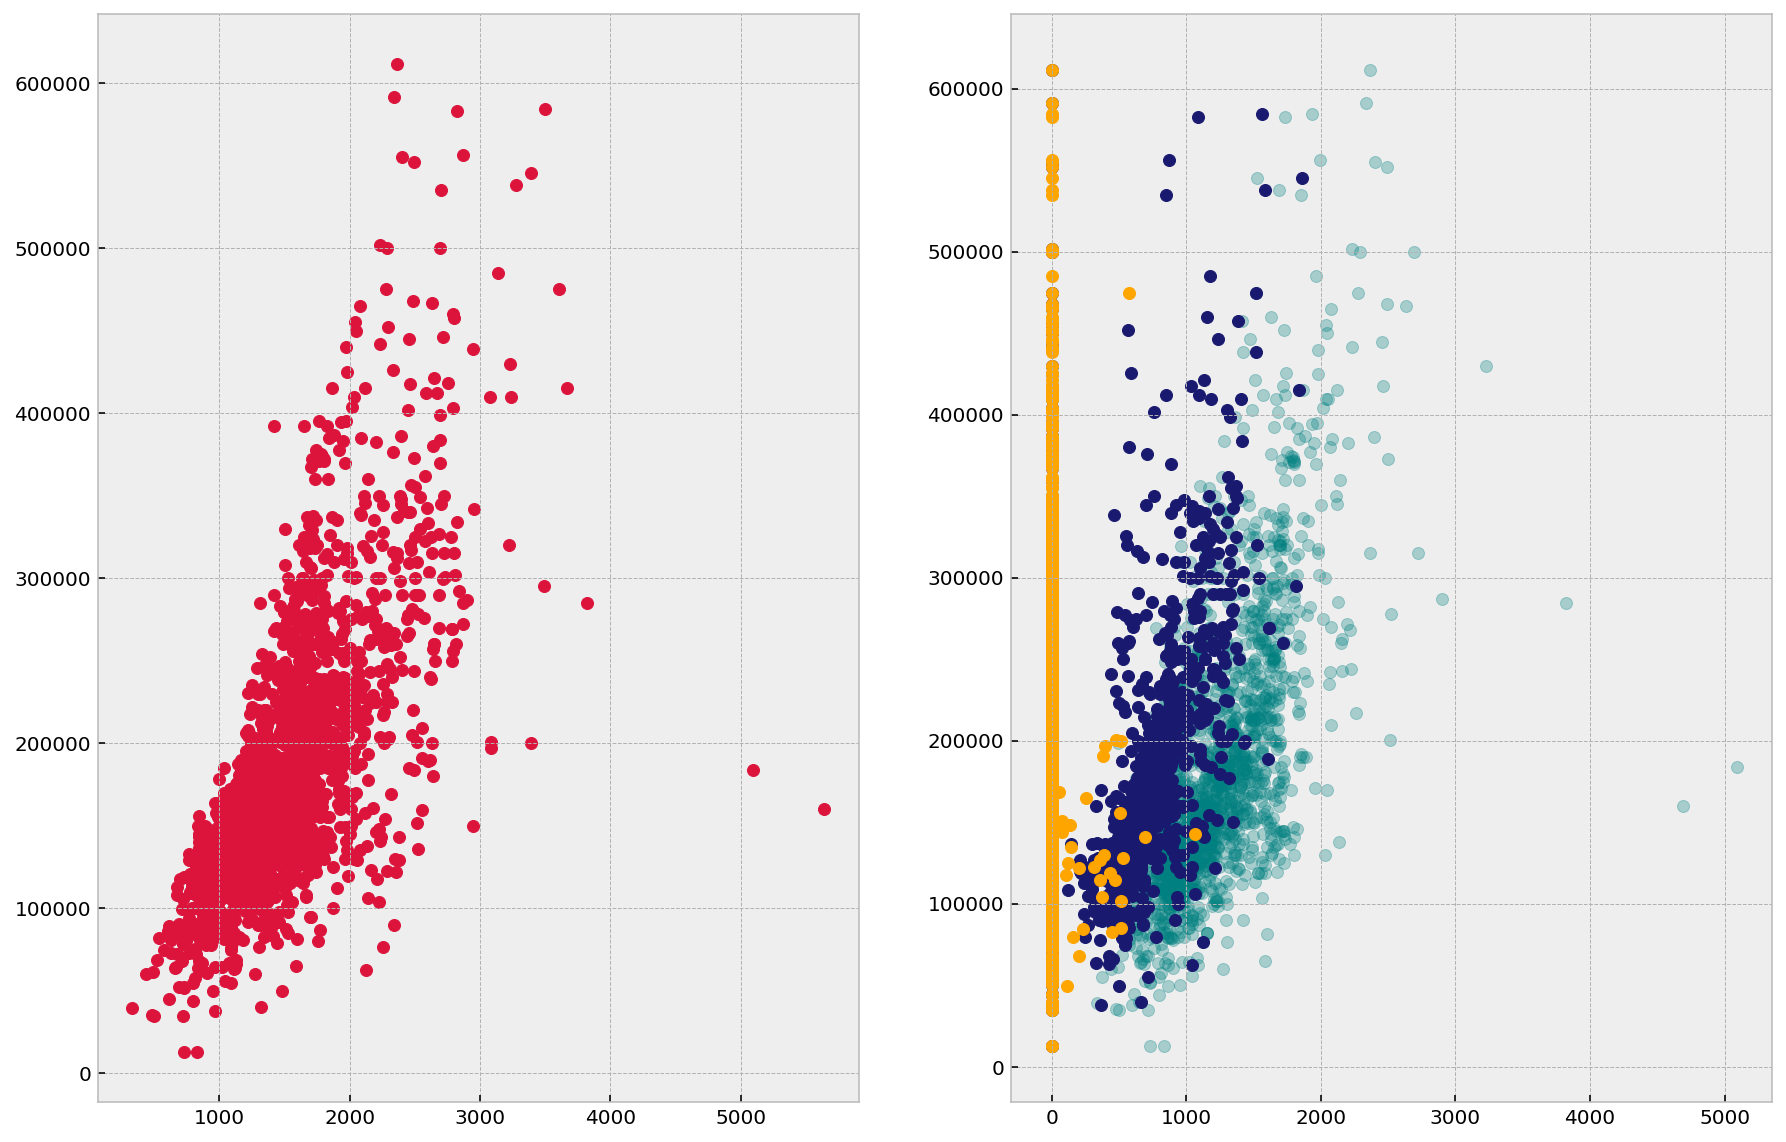

In [51]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df_train['Gr Liv Area'],df_train['SalePrice'], color = 'crimson')
ax2.scatter(df_train['1st Flr SF'],df_train['SalePrice'], color = 'teal', alpha = 0.3)
ax2.scatter(df_train['2nd Flr SF'],df_train['SalePrice'], color = 'midnightblue')
ax2.scatter(df_train['Low Qual Fin SF'],df_train['SalePrice'], color = 'orange');

Double check to confirm that the Gr Liv Area == 1st Flr SF + 2nd Flr SF + Low Qual Fin SF

In [52]:
(df_train['Gr Liv Area'] == (df_train['1st Flr SF'] + df_train['2nd Flr SF'] + df_train['Low Qual Fin SF'])).sum()

2049

In [53]:
df_train.drop(columns =['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], inplace=True)

In [54]:
df_train.shape

(2049, 71)

In [55]:
df_test.drop(columns =['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'], inplace=True)
df_test.shape

(879, 70)

Looking at the relationship between Garage Cars/ Garage Area vs Sale Price

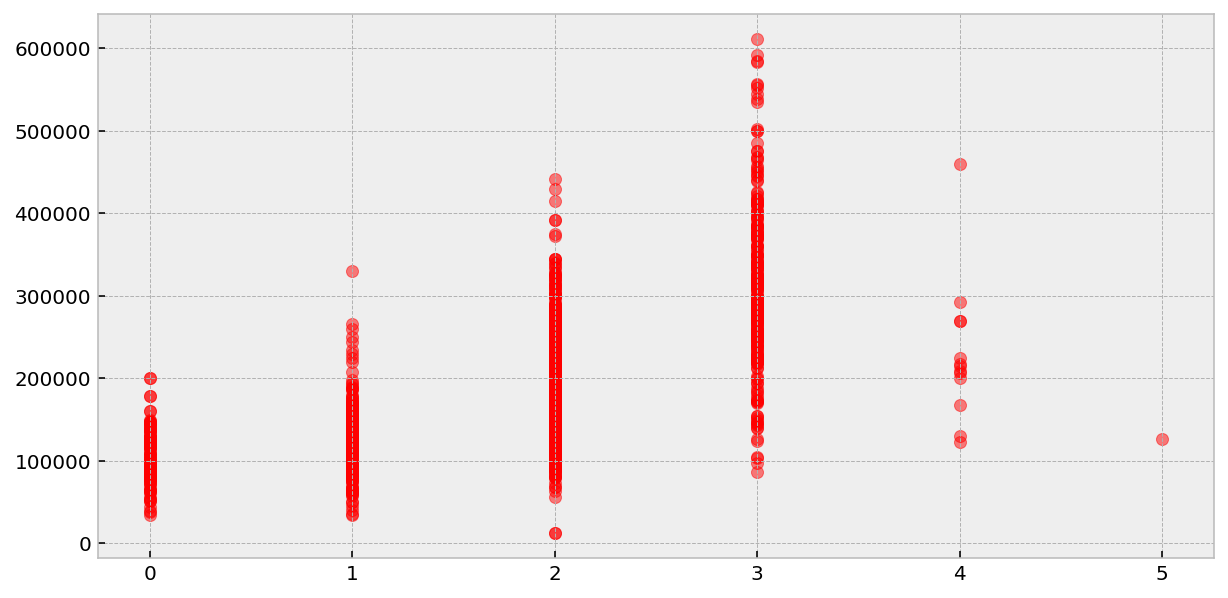

In [56]:
fig = plt.figure(figsize= (10,5))
plt.scatter(df_train['Garage Cars'], df_train['SalePrice'], c='r', alpha=0.5);

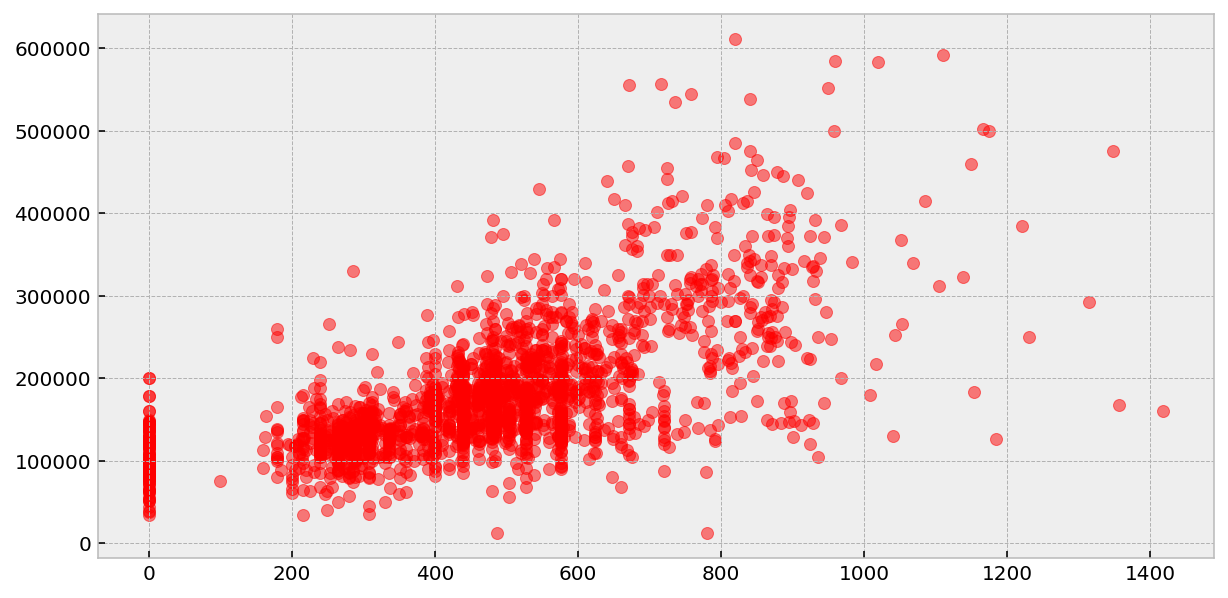

In [57]:
fig = plt.figure(figsize= (10,5))
plt.scatter(df_train['Garage Area'], df_train['SalePrice'], c='r', alpha=0.5);

Garage area has a better linear relationship with Sale Price, therefore we can remove Garage cars from the dataset as they are both are about the garage size

In [58]:
df_train.drop(columns =['Garage Cars'], inplace=True)
df_train.shape

(2049, 70)

In [59]:
df_test.drop(columns =['Garage Cars'], inplace=True)
df_test.shape

(879, 69)

We can see a clear relation between Total basement SF vs price and Basement 1 , 2 & unfinished vs price, therefore we can remove Basement 1 & 2 from the dataset.

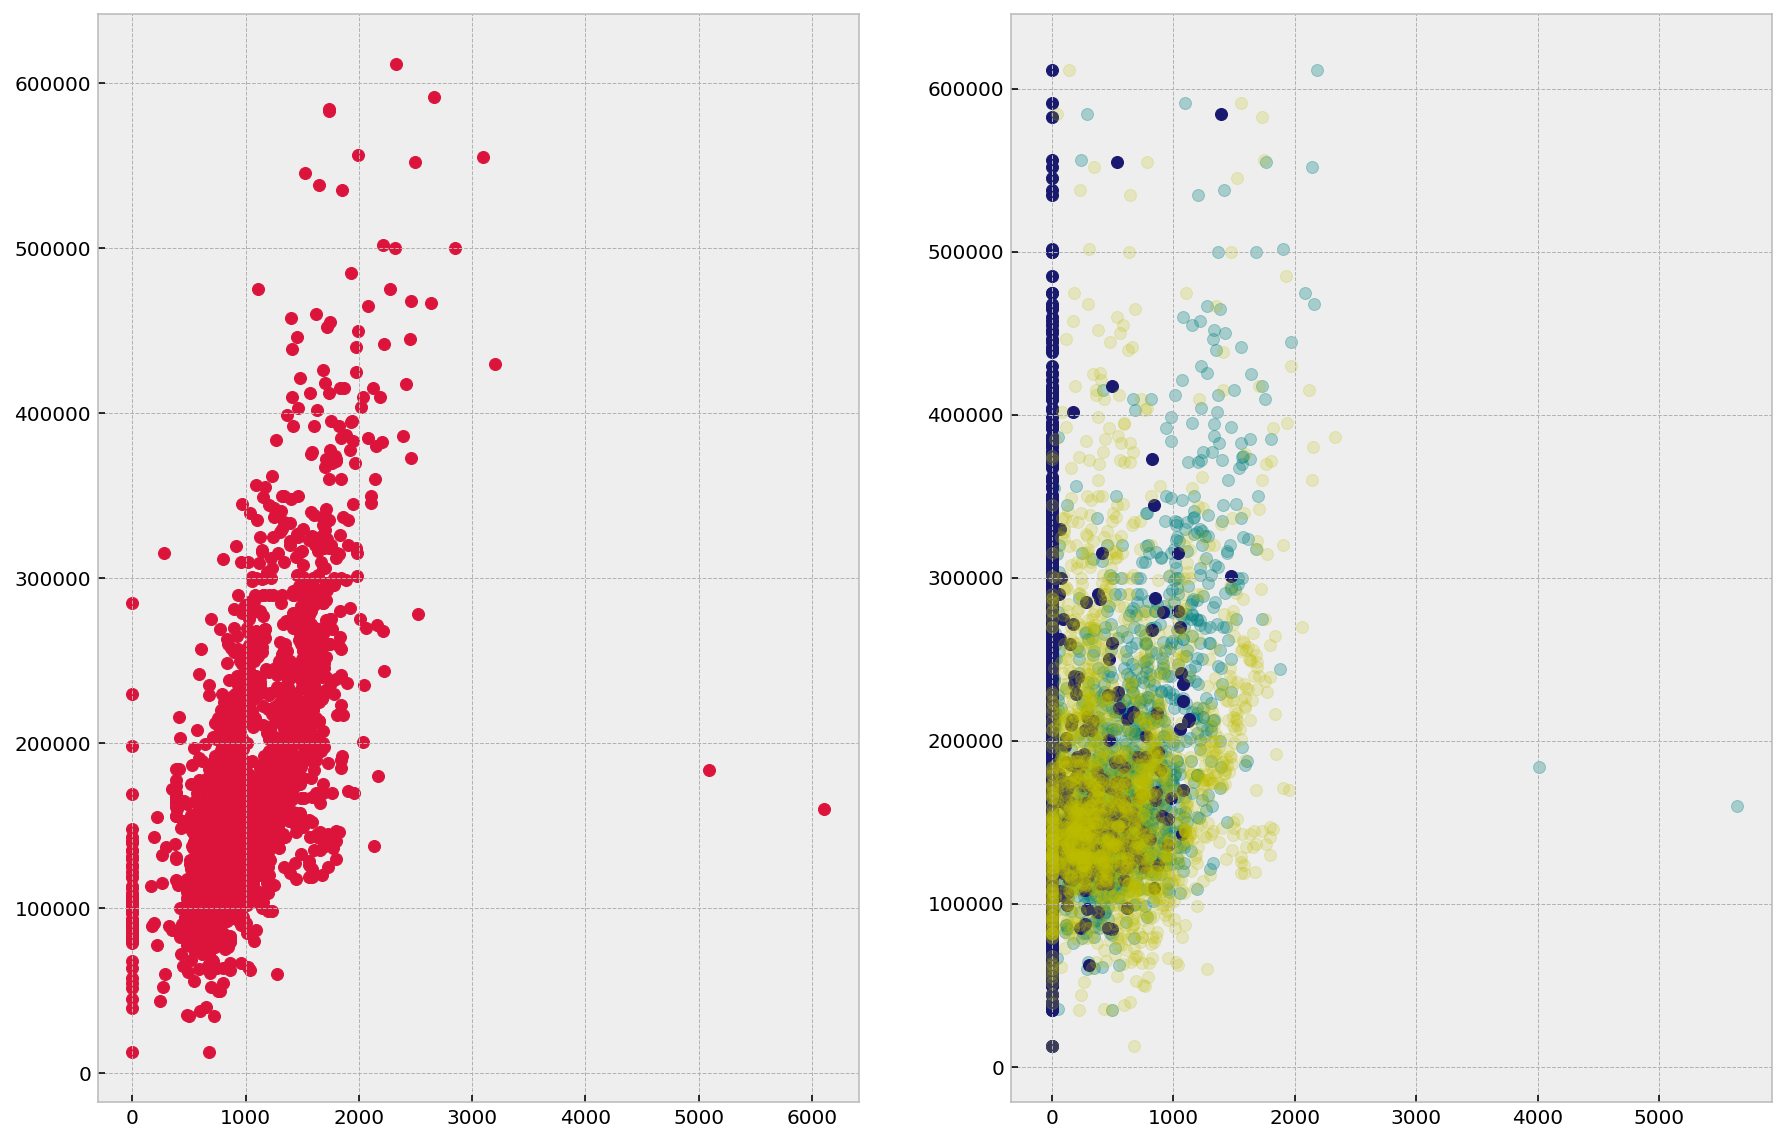

In [60]:
#combine Total basement sqft = unfinished and finished basement  BF1 & BF2 
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df_train['Total Bsmt SF'],df_train['SalePrice'], color = 'crimson')
ax2.scatter(df_train['BsmtFin SF 1'],df_train['SalePrice'], color = 'teal', alpha = 0.3)
ax2.scatter(df_train['BsmtFin SF 2'],df_train['SalePrice'], color = 'midnightblue')
ax2.scatter(df_train['Bsmt Unf SF'],df_train['SalePrice'], color = 'y', alpha=0.2);

Double check again if Total Bsmt SF =  Basement 1 SF + Basement 2 SF + Basement unfinished SF

In [61]:
(df_train['Total Bsmt SF'] == (df_train['BsmtFin SF 1'] + df_train['BsmtFin SF 2'] + df_train['Bsmt Unf SF'])).sum()

2049

In [62]:
df_train.drop(columns =['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], inplace=True)
df_train.shape

(2049, 67)

In [63]:
df_test.drop(columns =['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], inplace=True)
df_test.shape

(879, 66)

Instead of giving bathrooms of different size and place in separated columns, we should combine them together and create a new column called Total Bath

In [64]:
df_train['Total Bath'] = df_train['Bsmt Full Bath'] + 0.5*df_train['Bsmt Half Bath'] + df_train['Full Bath'] + 0.5*df_train['Half Bath']
df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond Roof Style  \
0        Norm      1Fam      2Story             6             8      Gable   
1        Norm      1Fam      2Story             7             5      Gable   
2        Norm      1Fam      1Story             5             7      Gable   
3        Norm      1Fam      2Story             5             5      Gable   
4        Norm      1Fam      1.5Fin             6             8      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0   CompShg      HdBoard      Plywood      BrkFace         289.0         Gd   
1   CompShg      VinylSd      VinylSd      BrkFace         132.0         Gd   
2   CompShg      VinylSd      VinylSd         None           0.0         TA   
3   CompShg      VinylSd      VinylSd         None           0.0         TA   
4   CompShg      Wd Sdng      Plywood         None           0.0         TA   

  Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
0         TA     CBlock        TA        TA            No            GLQ   
1         TA      PConc        Gd        TA            No            GLQ   
2         Gd     CBlock        TA        TA            No            GLQ   
3         TA      PConc        Gd        TA            No            Unf   
4         TA      PConc        Fa        Gd            No            Unf   

  BsmtFin Type 2  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0            Unf          725.0    GasA         Ex           Y      SBrkr   
1            Unf          913.0    GasA         Ex           Y      SBrkr   
2            Unf         1057.0    GasA         TA           Y      SBrkr   
3            Unf          384.0    GasA         Gd           Y      SBrkr   
4            Unf          676.0    GasA         TA           Y      SBrkr   

   Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   
3         1444             0.0             0.0          2          1   
4         1445             0.0             0.0          2          0   

   Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
0              3              1           Gd              6        Typ   
1              4              1           Gd              8        Typ   
2              3              1           Gd              5        Typ   
3              3              1           TA              7        Typ   
4              3              1           TA              6        Typ   

   Fireplaces  Fireplace Qu Garage Type Garage Finish  Garage Area  \
0           0  No Fireplace      Attchd           RFn        475.0   
1           1            TA      Attchd           RFn        559.0   
2           0  No Fireplace      Detchd           Unf        246.0   
3           0  No Fireplace     BuiltIn           Fin        400.0   
4           0  No Fireplace      D

In [65]:
df_train.drop(columns =['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], inplace=True)
df_train.shape

(2049, 64)

In [66]:
df_test['Total Bath'] = df_test['Bsmt Full Bath'] + 0.5*df_test['Bsmt Half Bath'] + df_test['Full Bath'] + 0.5*df_test['Half Bath']
df_test.drop(columns =['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], inplace=True)
df_test.shape

(879, 63)

There are many houses (more than 50%) without a porch, it shows that the presence of a porch is a good predictor but the type of porch does not matter. (need more explanation)

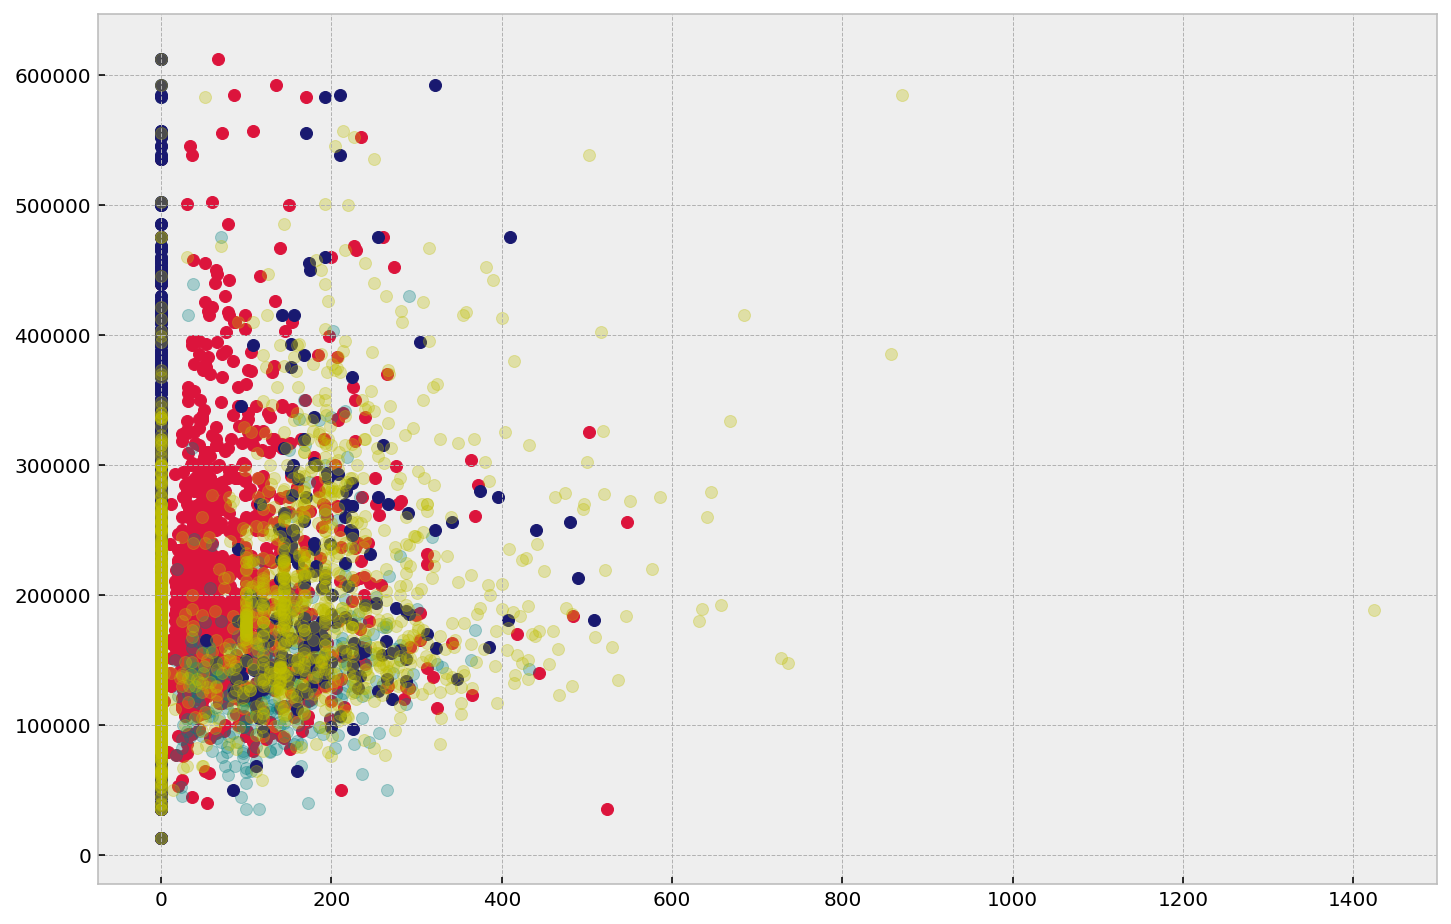

In [67]:
#Calculate total porch size in sqft and delete all other porches 
plt.figure(figsize=(12,8))
plt.scatter(df_train['Open Porch SF'],df_train['SalePrice'], color = 'crimson')
plt.scatter(df_train['Enclosed Porch'],df_train['SalePrice'], color = 'teal', alpha = 0.3)
plt.scatter(df_train['3Ssn Porch'],df_train['SalePrice'], color = 'midnightblue')
plt.scatter(df_train['Screen Porch'],df_train['SalePrice'], color = 'midnightblue')
plt.scatter(df_train['Wood Deck SF'],df_train['SalePrice'], color = 'y', alpha=0.3);


In [68]:
df_train['Total Porch/ Deck SF'] = df_train['Wood Deck SF'] + df_train['Open Porch SF'] + df_train['Enclosed Porch'] + df_train['3Ssn Porch'] + df_train['Screen Porch']
df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Area Street Lot Shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond Roof Style  \
0        Norm      1Fam      2Story             6             8      Gable   
1        Norm      1Fam      2Story             7             5      Gable   
2        Norm      1Fam      1Story             5             7      Gable   
3        Norm      1Fam      2Story             5             5      Gable   
4        Norm      1Fam      1.5Fin             6             8      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0   CompShg      HdBoard      Plywood      BrkFace         289.0         Gd   
1   CompShg      VinylSd      VinylSd      BrkFace         132.0         Gd   
2   CompShg      VinylSd      VinylSd         None           0.0         TA   
3   CompShg      VinylSd      VinylSd         None           0.0         TA   
4   CompShg      Wd Sdng      Plywood         None           0.0         TA   

  Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
0         TA     CBlock        TA        TA            No            GLQ   
1         TA      PConc        Gd        TA            No            GLQ   
2         Gd     CBlock        TA        TA            No            GLQ   
3         TA      PConc        Gd        TA            No            Unf   
4         TA      PConc        Fa        Gd            No            Unf   

  BsmtFin Type 2  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0            Unf          725.0    GasA         Ex           Y      SBrkr   
1            Unf          913.0    GasA         Ex           Y      SBrkr   
2            Unf         1057.0    GasA         TA           Y      SBrkr   
3            Unf          384.0    GasA         Gd           Y      SBrkr   
4            Unf          676.0    GasA         TA           Y      SBrkr   

   Gr Liv Area  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
0         1479              3              1           Gd              6   
1         2122              4              1           Gd              8   
2         1057              3              1           Gd              5   
3         1444              3              1           TA              7   
4         1445              3              1           TA              6   

  Functional  Fireplaces  Fireplace Qu Garage Type Garage Finish  Garage Area  \
0        Typ           0  No Fireplace      Attchd           RFn        475.0   
1        Typ           1            TA      Attchd           RFn        559.0   
2        Typ           0  No Fireplace      Detchd           Unf        246.0   
3        Typ           0  No Fireplace     BuiltIn           Fin        400.0   
4        Typ           0  No Fireplace      Detchd           Unf        484.0   

  Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  \
0          TA          TA           Y             0             44   
1          TA          TA           Y             0             74   
2          TA          TA           Y             0             52   
3          TA          TA           Y 

In [69]:
df_train.drop(columns =['Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'], inplace=True)
df_train.shape

(2049, 60)

In [70]:
df_test['Total Porch/ Deck SF'] = df_test['Wood Deck SF'] + df_test['Open Porch SF'] + df_test['Enclosed Porch'] + df_test['3Ssn Porch'] + df_test['Screen Porch']
df_test.drop(columns =['Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'], inplace=True)
df_test.shape

(879, 59)

In [71]:
get_zero(df_train)

Mas Vnr Area: 1239 Zeros
Total Bsmt SF: 55 Zeros
Bedroom AbvGr: 5 Zeros
Kitchen AbvGr: 2 Zeros
Fireplaces: 999 Zeros
Garage Area: 113 Zeros
Pool Area: 2040 Zeros
Misc Val: 1984 Zeros
Age when Sold: 80 Zeros
Garage Age when sold: 105 Zeros
Total Porch/ Deck SF: 343 Zeros


In [72]:
get_zero(df_test)

Mas Vnr Area: 535 Zeros
Total Bsmt SF: 25 Zeros
Bedroom AbvGr: 3 Zeros
Kitchen AbvGr: 1 Zeros
Fireplaces: 422 Zeros
Garage Area: 44 Zeros
Pool Area: 875 Zeros
Misc Val: 841 Zeros
Age when Sold: 36 Zeros
Garage Age when sold: 47 Zeros
Total Porch/ Deck SF: 140 Zeros


After merging, we still have some columns with huge percentage of zero values, we can proceed to remove these columns with zero values of more than 80%

In [73]:
for missing_values in df_train:
    if( df_train[missing_values] == 0).sum()/ df_train.index.shape[0] > 0.8:
        df_train.drop(columns=missing_values, inplace = True)
        
print(get_zero(df_train))
df_train.shape

Mas Vnr Area: 1239 Zeros
Total Bsmt SF: 55 Zeros
Bedroom AbvGr: 5 Zeros
Kitchen AbvGr: 2 Zeros
Fireplaces: 999 Zeros
Garage Area: 113 Zeros
Age when Sold: 80 Zeros
Garage Age when sold: 105 Zeros
Total Porch/ Deck SF: 343 Zeros
None


(2049, 58)

In [74]:
for missing_values in df_test:
    if( df_test[missing_values] == 0).sum()/ df_test.index.shape[0] > 0.8:
        df_test.drop(columns=missing_values, inplace = True)
        
print(get_zero(df_test))
df_test.shape

Mas Vnr Area: 535 Zeros
Total Bsmt SF: 25 Zeros
Bedroom AbvGr: 3 Zeros
Kitchen AbvGr: 1 Zeros
Fireplaces: 422 Zeros
Garage Area: 44 Zeros
Age when Sold: 36 Zeros
Garage Age when sold: 47 Zeros
Total Porch/ Deck SF: 140 Zeros
None


(879, 57)

### Exploratory Visualizations

#### Dealing with outliers for continuous data (only on the train dataset) - Box Plots

We should remove Lot Area with > 60000

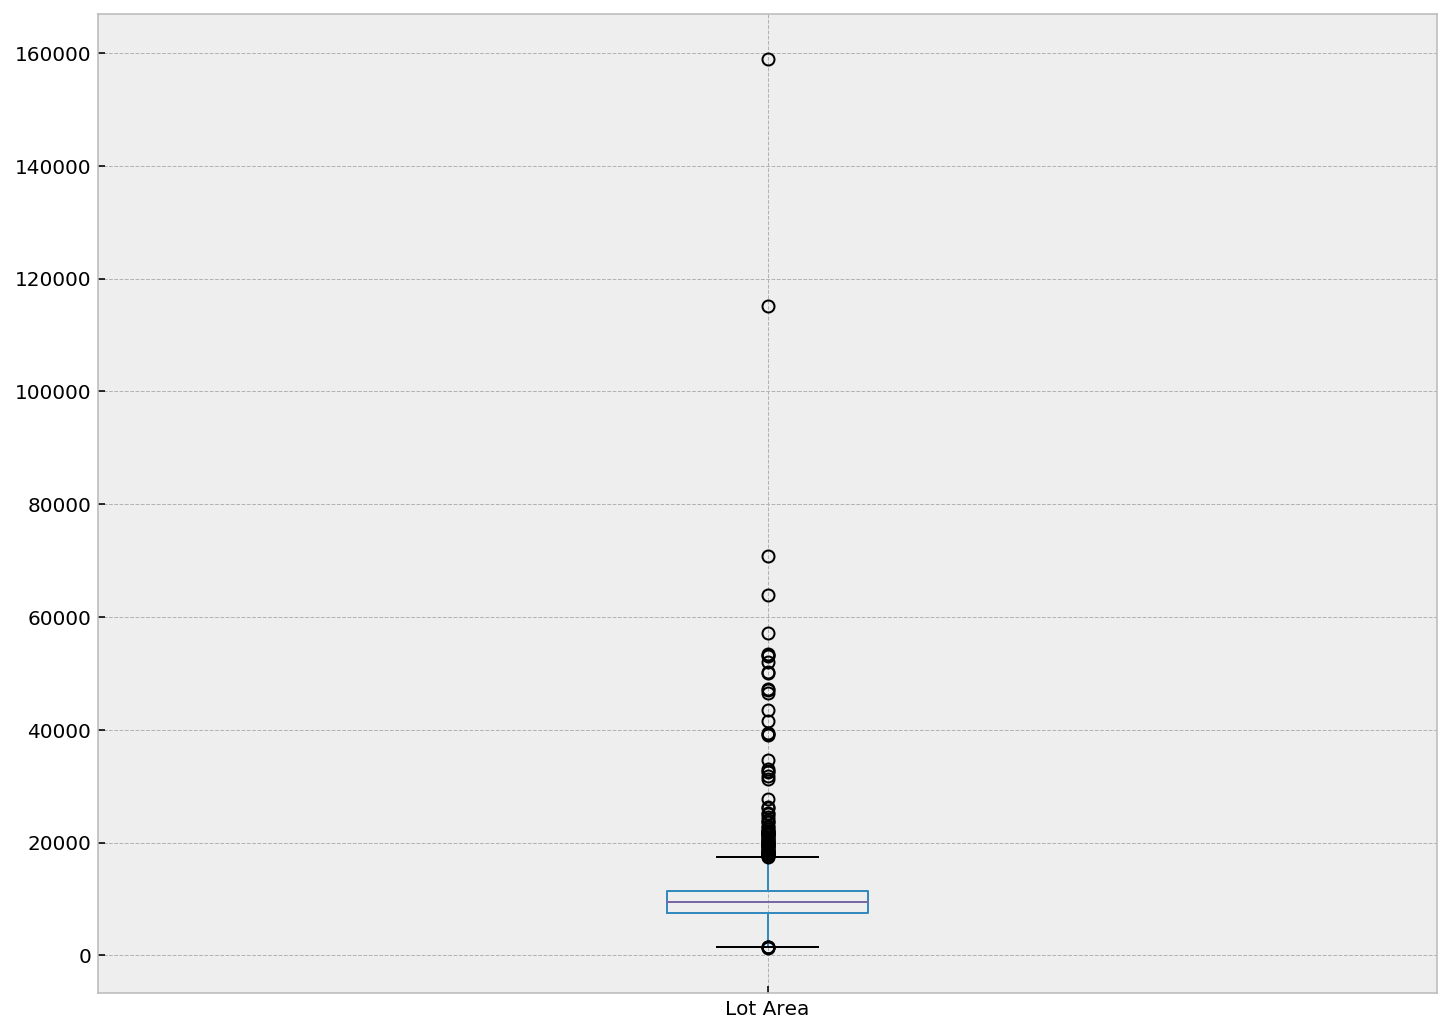

In [75]:
plt.figure(figsize=(12,9))

df_train.boxplot(column = ['Lot Area']);


In [76]:
lot_mask= df_train[(df_train['Lot Area'] > 60000)].index
df_train.drop(lot_mask, inplace=True)
df_train.shape

(2045, 58)

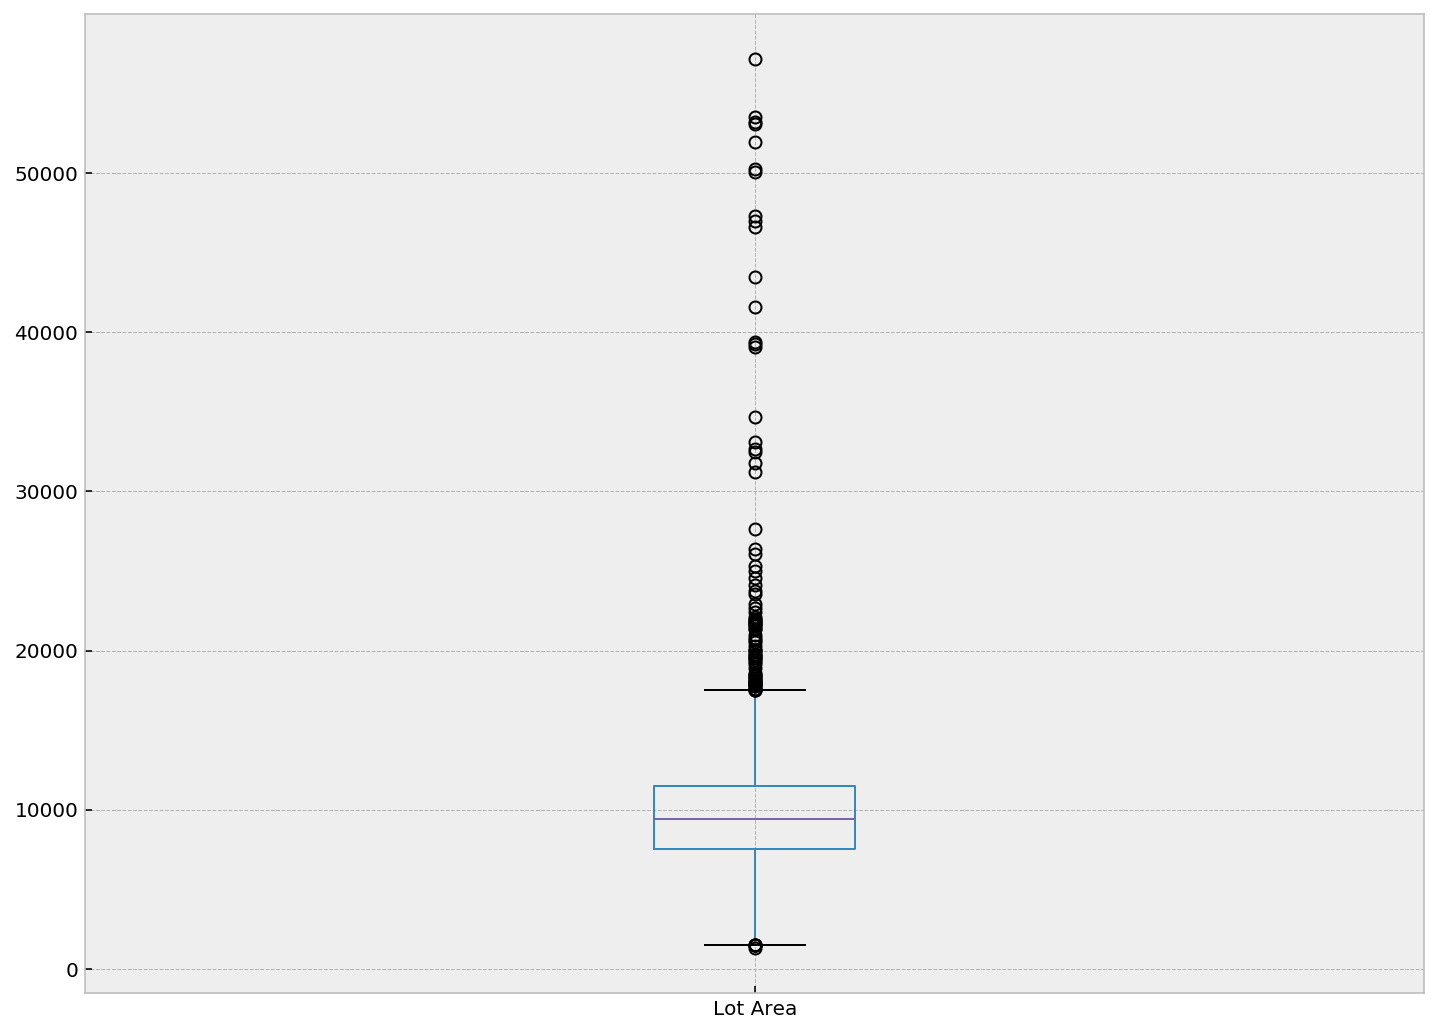

In [77]:
plt.figure(figsize=(12,9))

df_train.boxplot(column = ['Lot Area'])

Remove Total Bsmt SF & Gr Liv Area > 4000

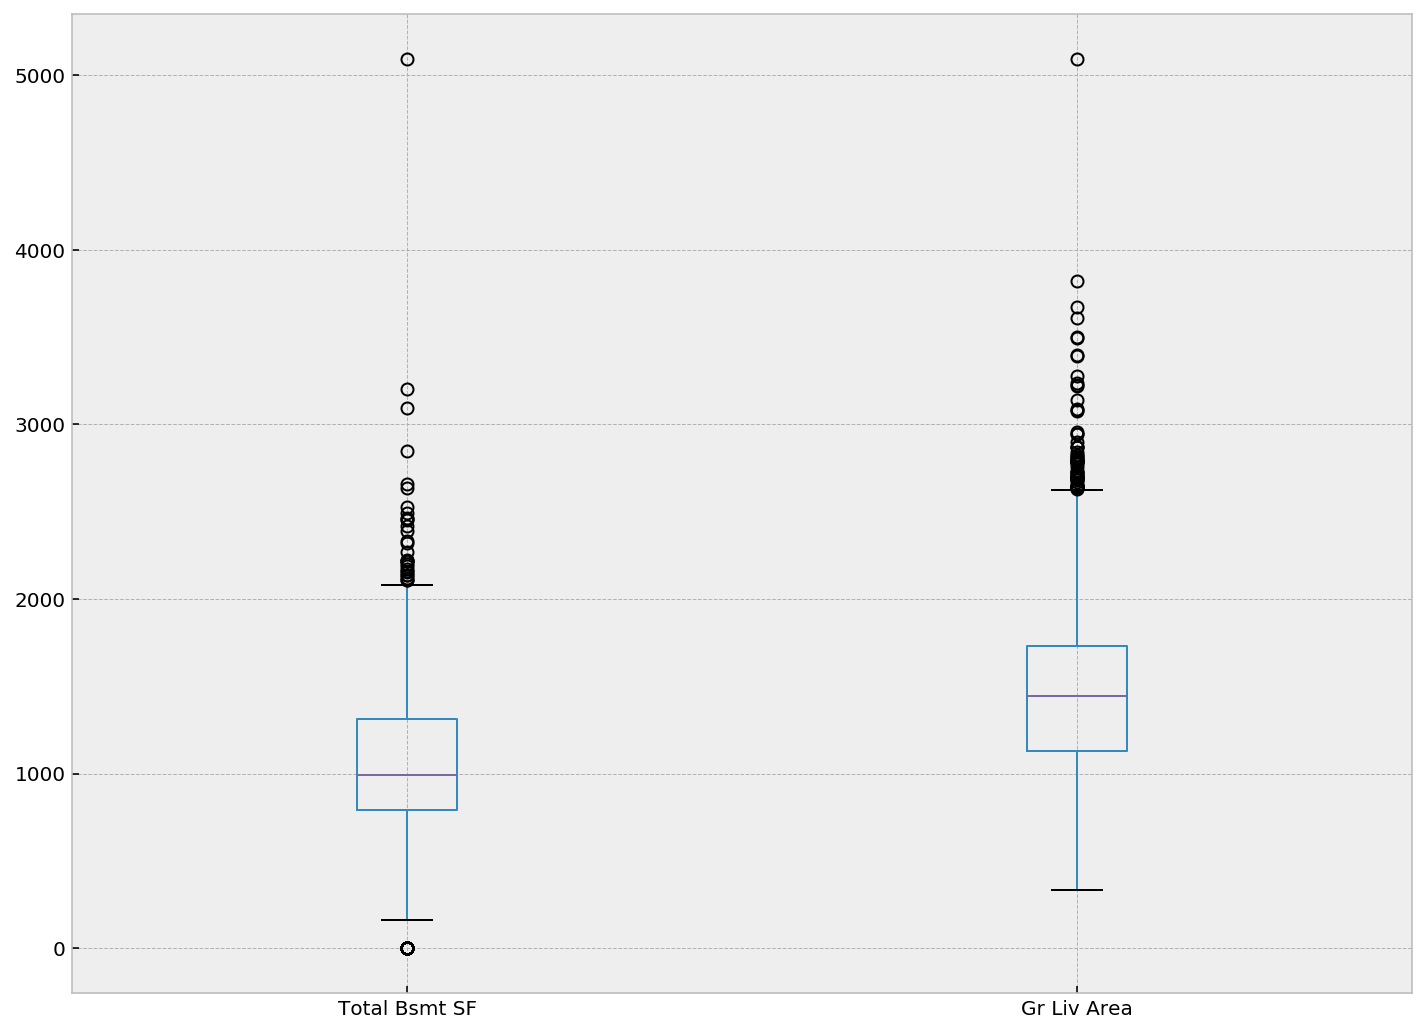

In [78]:
plt.figure(figsize=(12,9))
df_train.boxplot(column = ['Total Bsmt SF', 'Gr Liv Area']);

In [79]:
bsmt_mask= df_train[(df_train['Total Bsmt SF'] > 4000)].index
df_train.drop(bsmt_mask, inplace=True)

gr_mask= df_train[(df_train['Gr Liv Area'] > 4000)].index
df_train.drop(gr_mask, inplace=True)
df_train.shape

(2044, 58)

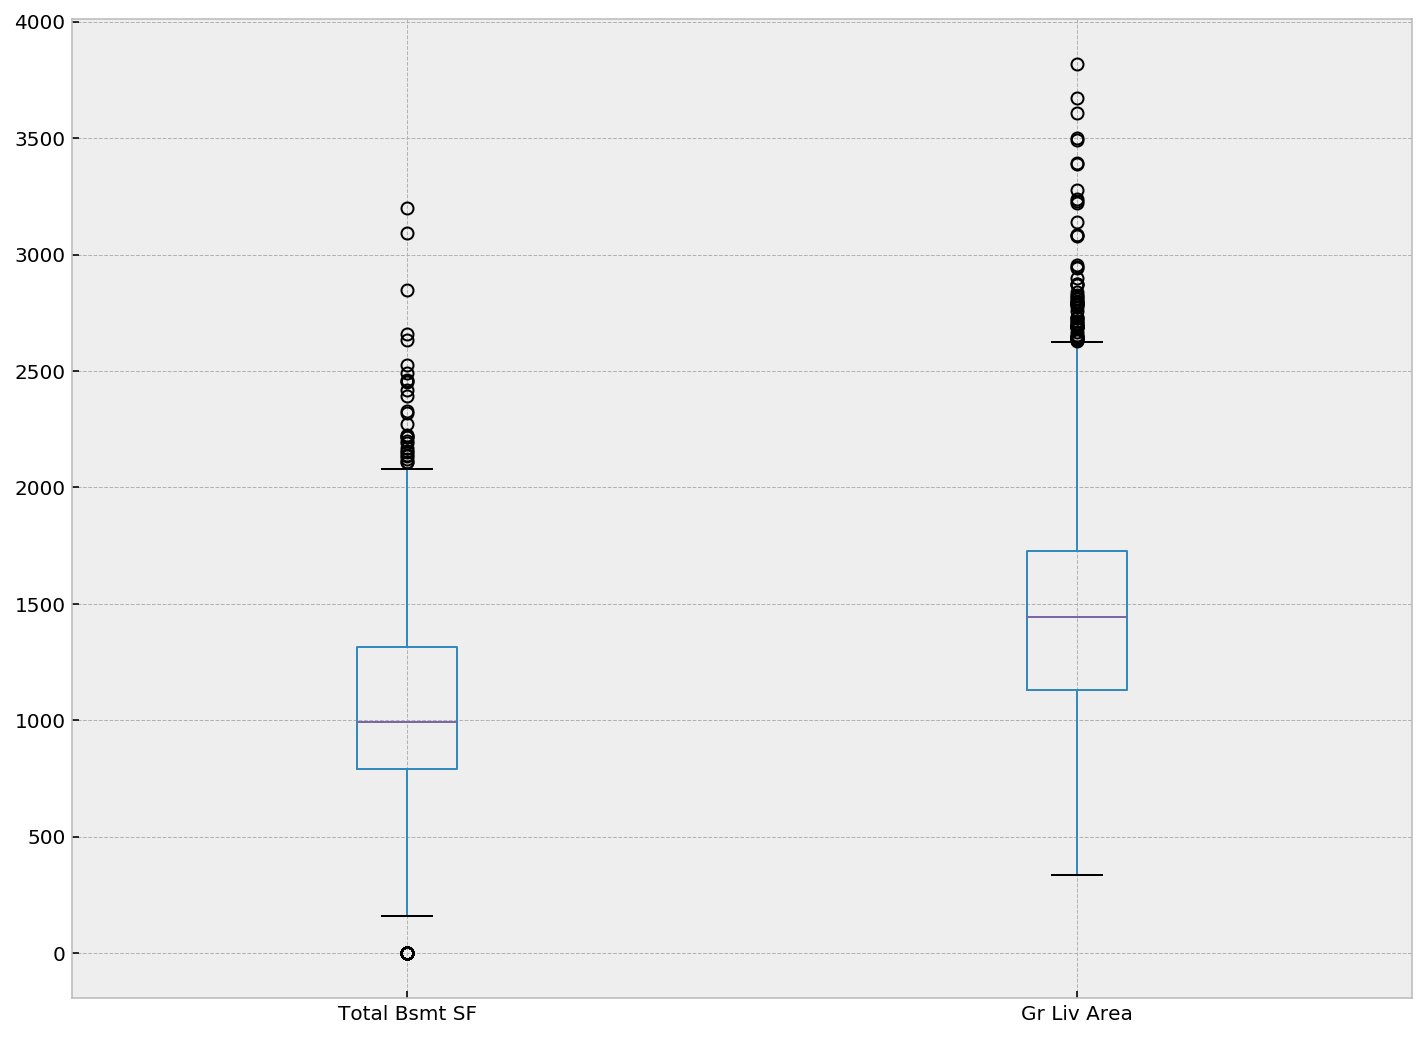

In [80]:
plt.figure(figsize=(12,9))

df_train.boxplot(column = ['Total Bsmt SF', 'Gr Liv Area']);

Remove Mas Vnr Area & Total Porch/ Deck SF > 1400

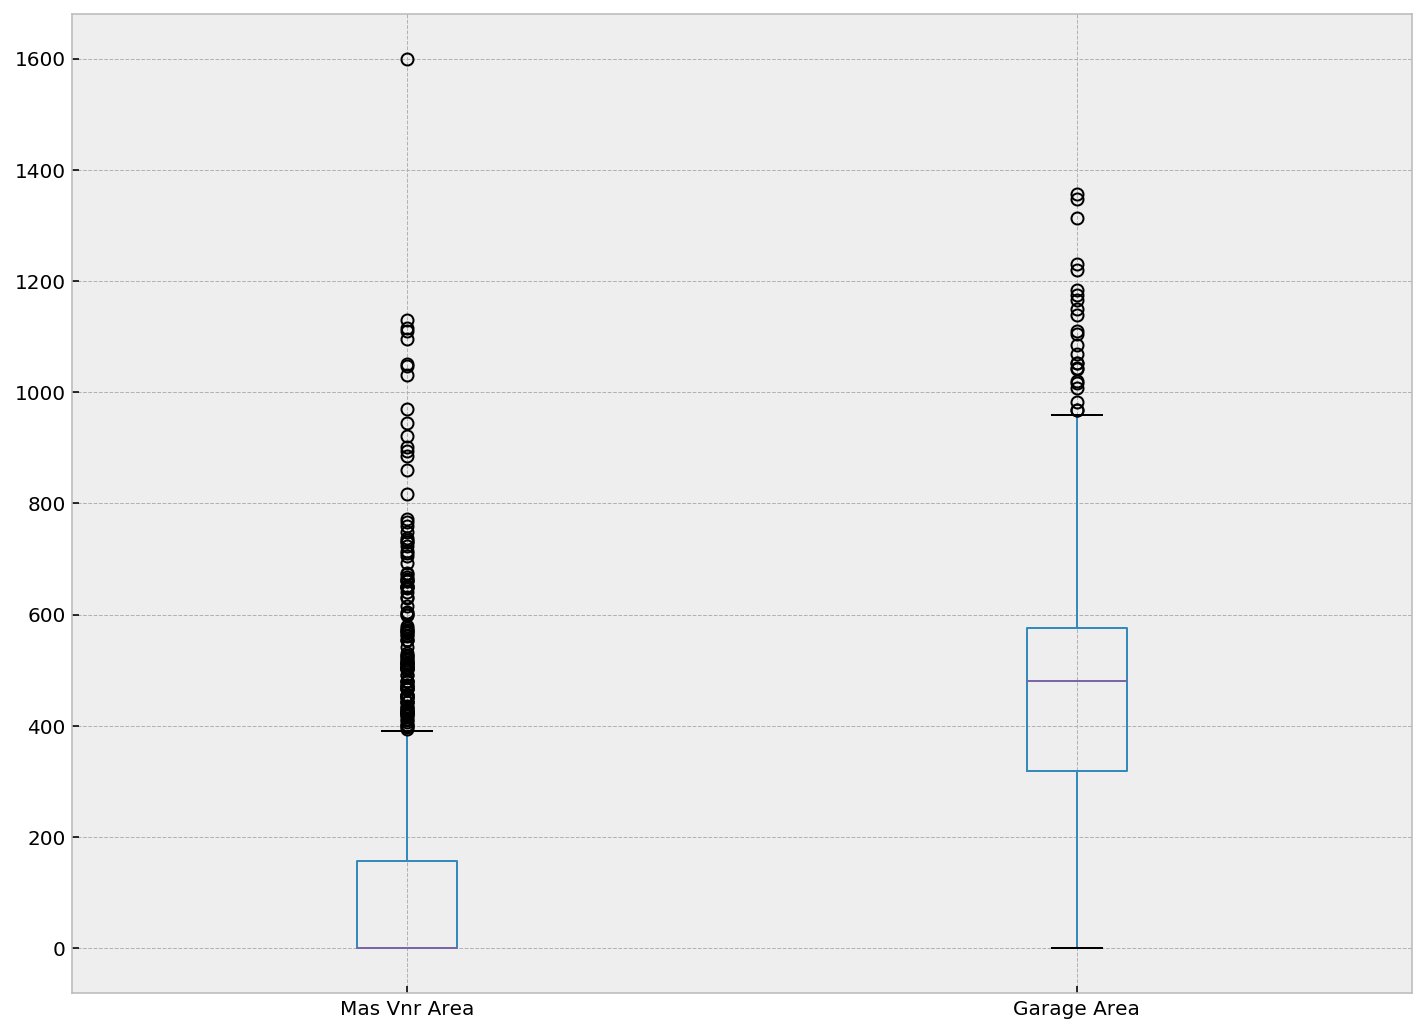

In [81]:
plt.figure(figsize=(12,9))
df_train.boxplot(column = [ 'Mas Vnr Area', 'Garage Area']);

In [82]:
mas_mask= df_train[(df_train['Mas Vnr Area'] > 1400)].index
df_train.drop(mas_mask, inplace=True)


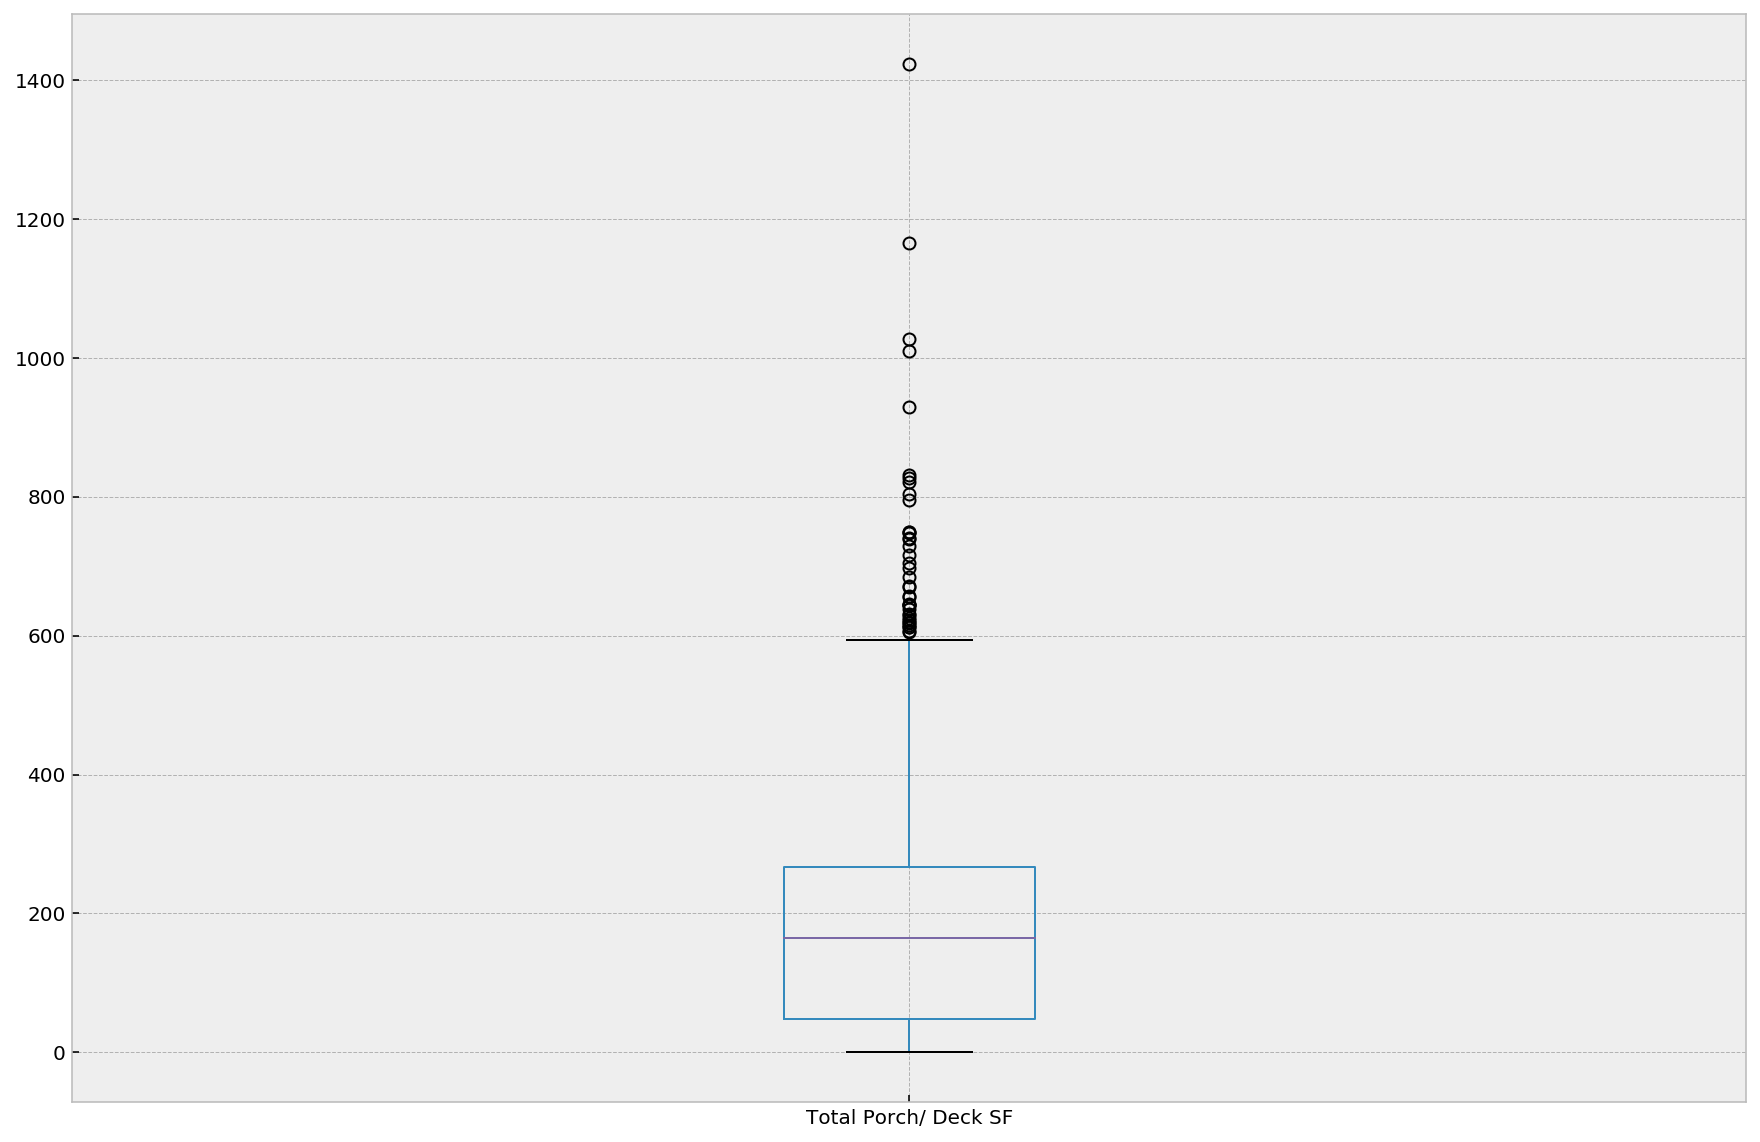

In [83]:
plt.figure(figsize=(15,10))

df_train.boxplot(column = ['Total Porch/ Deck SF'])

In [84]:
porch_mask= df_train[(df_train['Total Porch/ Deck SF'] > 1100)].index
df_train.drop(porch_mask, inplace=True)
df_train.shape

(2041, 58)

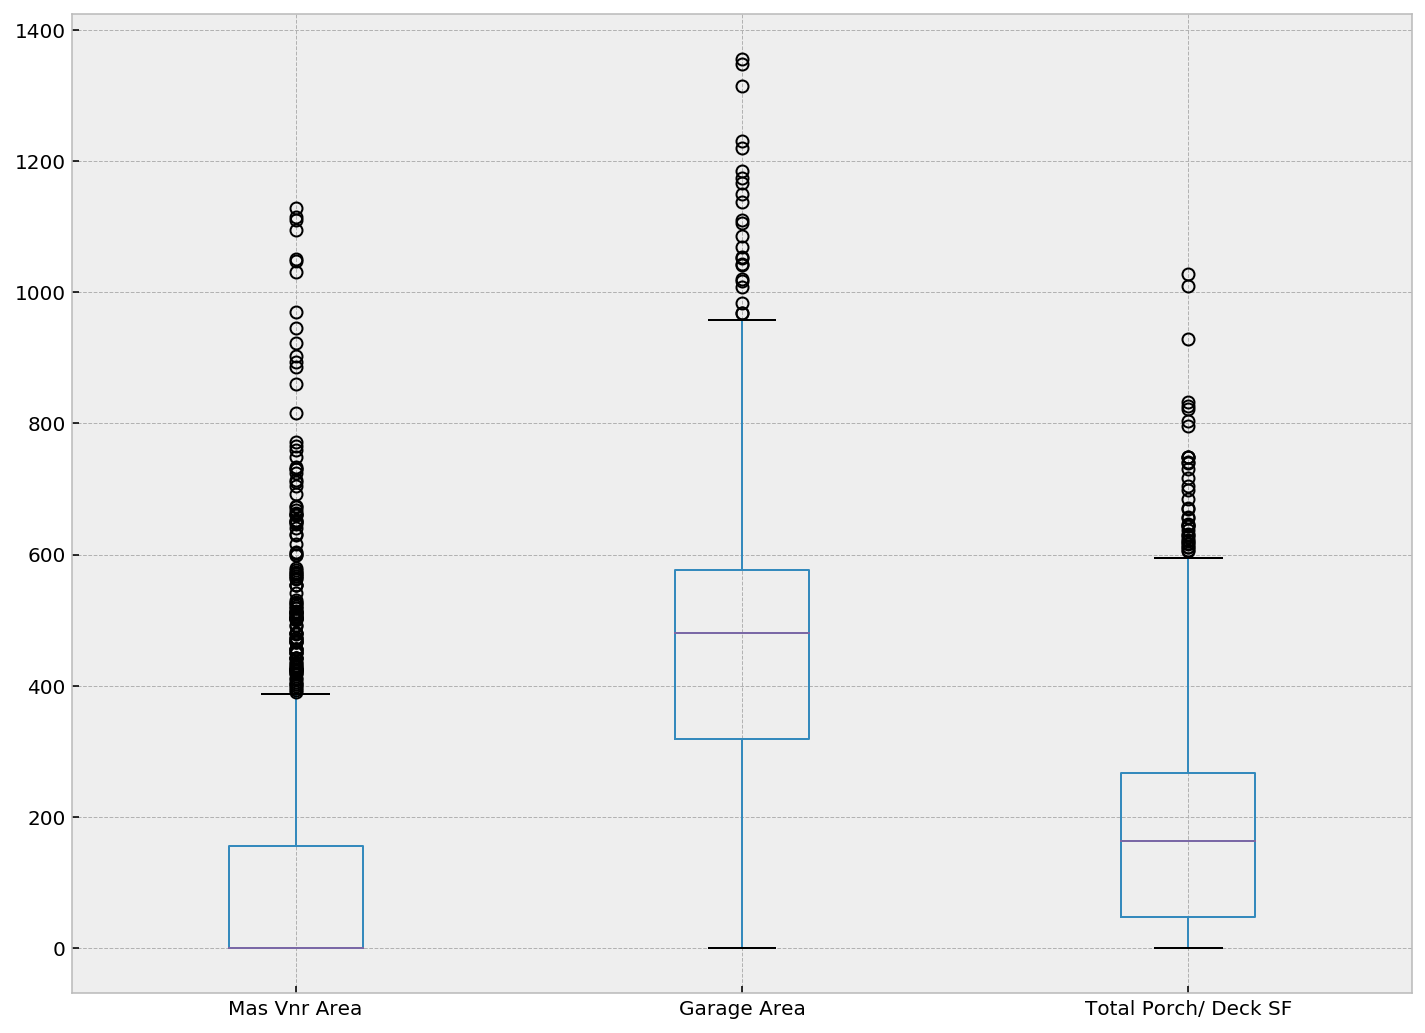

In [85]:
plt.figure(figsize=(12,9))
df_train.boxplot(column = [ 'Mas Vnr Area', 'Garage Area', 'Total Porch/ Deck SF']);

Remove SalePrice > 600000

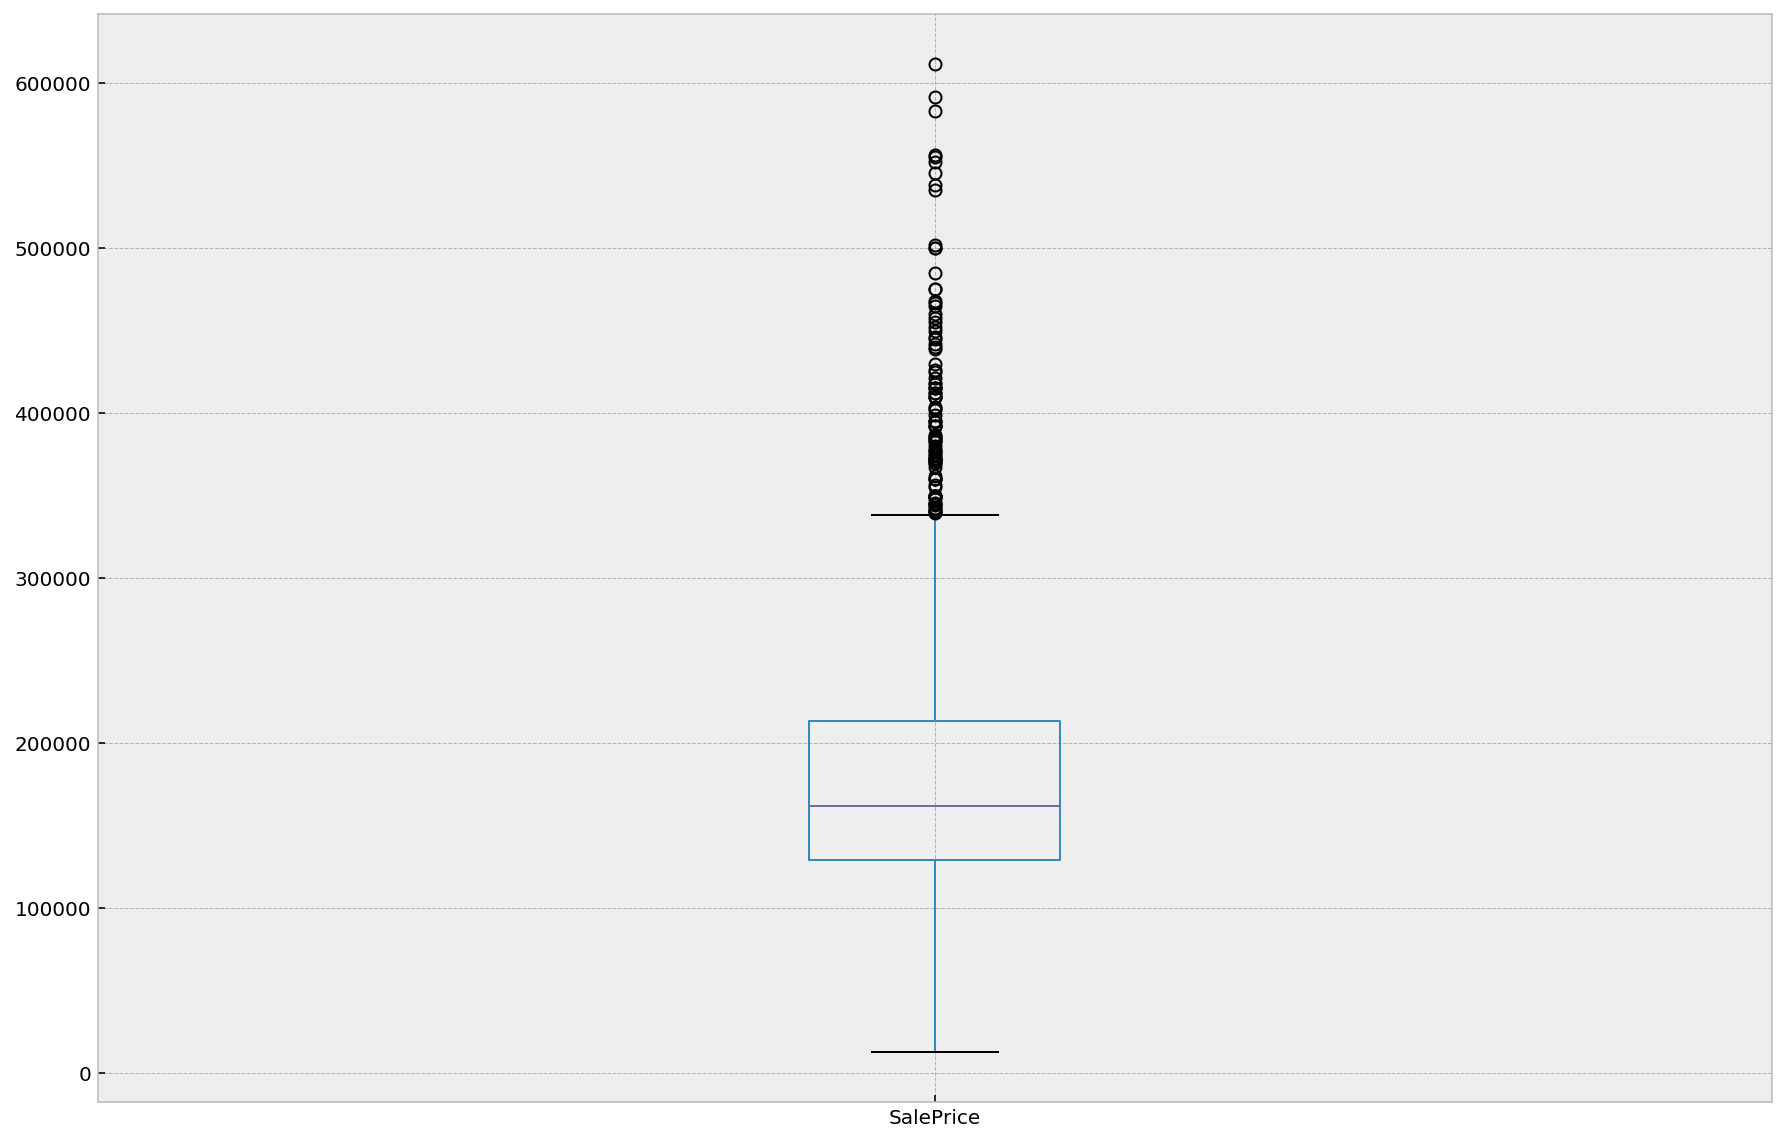

In [86]:
plt.figure(figsize=(15,10))

df_train.boxplot(column = ['SalePrice']);

In [87]:
sale_mask= df_train[(df_train['SalePrice'] > 600000)].index
df_train.drop(sale_mask, inplace=True)
df_train.shape

(2040, 58)

Dropping Id and PID as they are just an index of each house, will not be used as a feature. We will put these features into a new dataframe

In [88]:
df_train_new = df_train.drop(columns =['Id', 'PID'])
df_test_new = df_test.drop(columns =['Id', 'PID'])

In [89]:
df_train_new.shape

(2040, 56)

In [90]:
df_test_new.shape

(879, 55)


#### Looking at distribution of data in each feature - histogram

We will set a threshold of frequency > 1224 (60% of total rows - 2041) for collinear relationship between Norminal & Ordinal features      


In [91]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20,90)) 
    ax = ax.ravel()     
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_ylabel('Frequency')
        ax[i].axhline(y=1326, color='r')

In [92]:
to_plot = ['MS SubClass', 'MS Zoning', 'Lot Area','Street','Lot Shape','Land Contour','Utilities',
           'Lot Config', 'Land Slope','Neighborhood', 'Condition 1', 'Condition 2', 'House Style', 
           'Roof Style','Roof Matl','Bldg Type', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area',
           'Exter Qual', 'Exter Cond','Bsmt Qual','Total Bsmt SF','Bsmt Cond', 'Bsmt Exposure',
           'BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical', 'Kitchen Qual','Functional',
           'Fireplace Qu', 'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Overall Qual',
           'Overall Cond','Foundation', 'Heating', 'Central Air', 'Garage Type', 'Mas Vnr Type', 
           'Gr Liv Area','Bedroom AbvGr','Kitchen AbvGr','Fireplaces','Garage Area','Sale Type',
           'Remodeled Y/N','Age when Sold','Total Bath','Total Porch/ Deck SF']

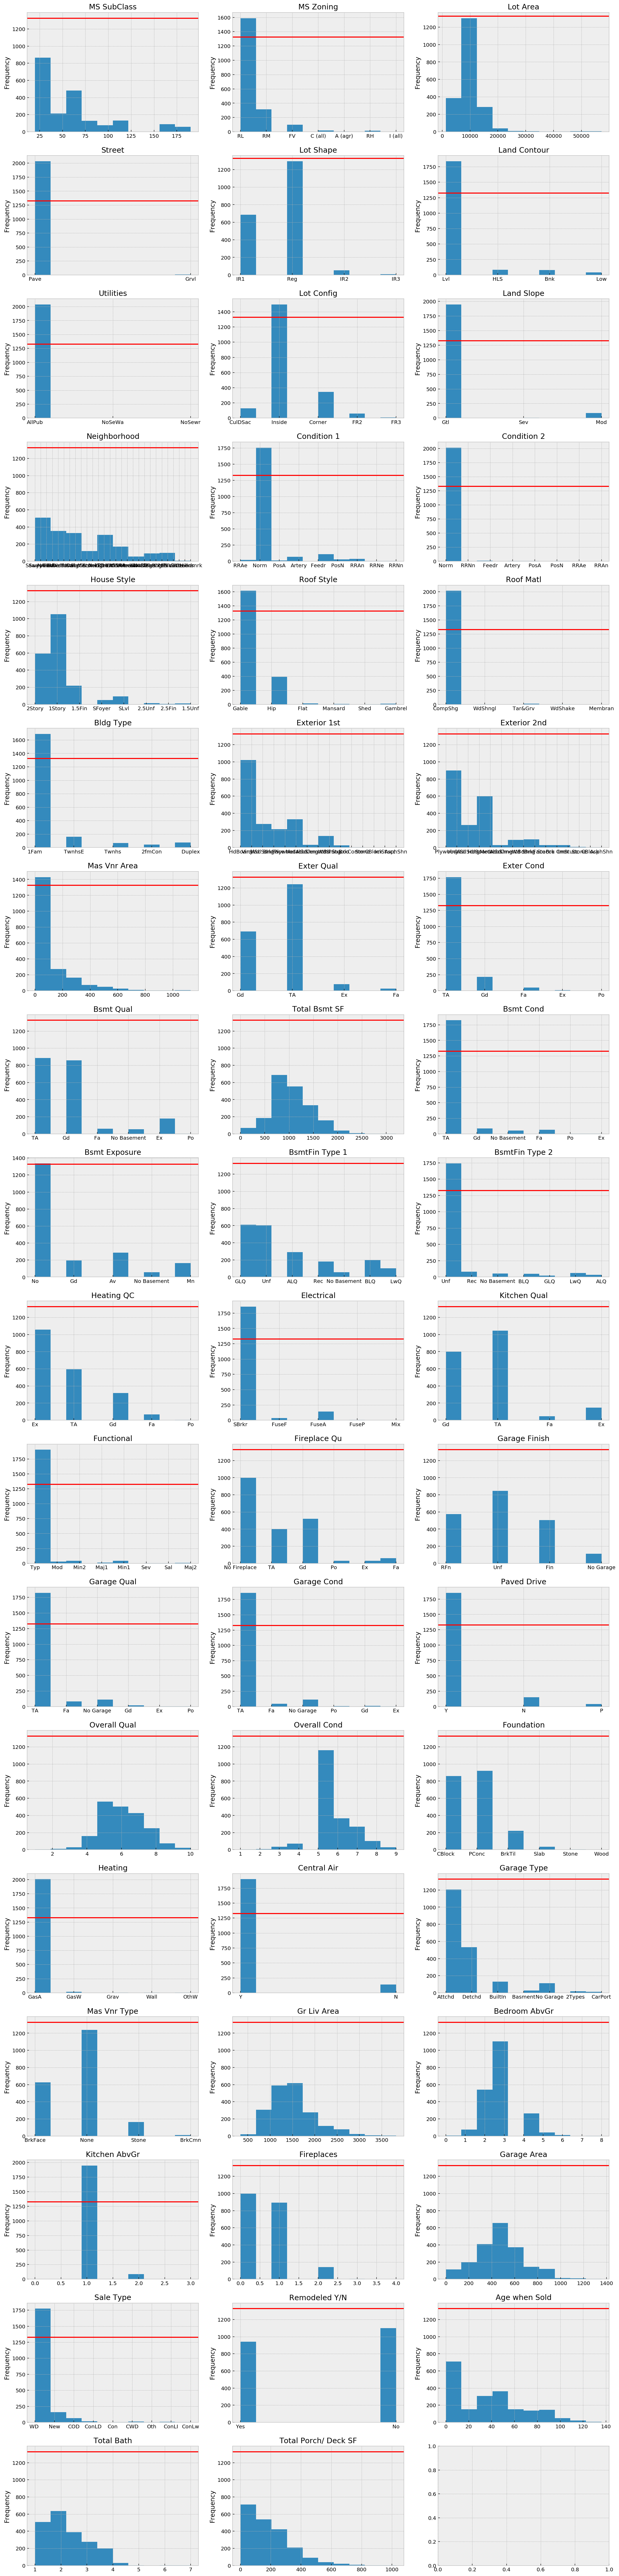

In [93]:
subplot_histograms(df_train_new, to_plot, to_plot) 

Features to remove from dataframe as they have one variable that is above the threshold

In [94]:
to_remove = ['MS Zoning', 'Street','Lot Shape','Land Contour','Utilities', 'Lot Config', 'Land Slope', 'Condition 1',
             'Condition 2', 'Roof Style','Roof Matl', 'Exter Qual', 'Exter Cond','Bsmt Cond','BsmtFin Type 2','Electrical', 
             'Functional', 'Garage Qual','Garage Cond','Paved Drive', 'Heating', 'Central Air', 'Mas Vnr Type', 
             'Lot Area','Bldg Type','Mas Vnr Area','Kitchen AbvGr','Sale Type']

In [95]:
to_remove_test = ['MS Zoning', 'Street','Lot Shape','Land Contour','Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 
                  'Condition 2', 'Roof Style','Roof Matl', 'Exter Qual', 'Exter Cond','Bsmt Cond','BsmtFin Type 2',
                  'Electrical', 'Functional', 'Garage Qual','Garage Cond','Paved Drive', 'Heating', 'Central Air', 
                  'Mas Vnr Type', 'Lot Area','Bldg Type','Mas Vnr Area','Kitchen AbvGr','Sale Type' ]

In [96]:
df_train_new.drop(columns = to_remove, inplace=True)

In [97]:
df_test_new.drop(columns = to_remove, inplace=True)

In [98]:
df_train_new.shape

(2040, 28)

In [99]:
df_test_new.shape

(879, 27)

### Preprocessing of Data

In [100]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2050
Data columns (total 28 columns):
MS SubClass             2040 non-null int64
Neighborhood            2040 non-null object
House Style             2040 non-null object
Overall Qual            2040 non-null int64
Overall Cond            2040 non-null int64
Exterior 1st            2040 non-null object
Exterior 2nd            2040 non-null object
Foundation              2040 non-null object
Bsmt Qual               2040 non-null object
Bsmt Exposure           2040 non-null object
BsmtFin Type 1          2040 non-null object
Total Bsmt SF           2040 non-null float64
Heating QC              2040 non-null object
Gr Liv Area             2040 non-null int64
Bedroom AbvGr           2040 non-null int64
Kitchen Qual            2040 non-null object
TotRms AbvGrd           2040 non-null int64
Fireplaces              2040 non-null int64
Fireplace Qu            2040 non-null object
Garage Type             2040 non-null object

In [101]:
df_train_new['MS SubClass'] = df_train_new['MS SubClass'].astype(str)
df_test_new['MS SubClass'] = df_test_new['MS SubClass'].astype(str)

We are mapping all the Ordinal columns into labels

In [102]:
df_train_new['Bsmt Qual'] = df_train_new['Bsmt Qual'].map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train_new['Bsmt Exposure'] = df_train_new['Bsmt Exposure'].map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_train_new['BsmtFin Type 1'] = df_train_new['BsmtFin Type 1'].map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5, 'GLQ':6})
df_train_new['Heating QC'] = df_train_new['Heating QC'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train_new['Kitchen Qual'] = df_train_new['Kitchen Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train_new['Fireplace Qu'] = df_train_new['Fireplace Qu'].map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train_new['Garage Finish'] = df_train_new['Garage Finish'].map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})


In [103]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2050
Data columns (total 28 columns):
MS SubClass             2040 non-null object
Neighborhood            2040 non-null object
House Style             2040 non-null object
Overall Qual            2040 non-null int64
Overall Cond            2040 non-null int64
Exterior 1st            2040 non-null object
Exterior 2nd            2040 non-null object
Foundation              2040 non-null object
Bsmt Qual               2040 non-null int64
Bsmt Exposure           2040 non-null int64
BsmtFin Type 1          2040 non-null int64
Total Bsmt SF           2040 non-null float64
Heating QC              2040 non-null int64
Gr Liv Area             2040 non-null int64
Bedroom AbvGr           2040 non-null int64
Kitchen Qual            2040 non-null int64
TotRms AbvGrd           2040 non-null int64
Fireplaces              2040 non-null int64
Fireplace Qu            2040 non-null int64
Garage Type             2040 non-null object
Gara

In [104]:
df_test_new['Bsmt Qual'] = df_test_new['Bsmt Qual'].map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test_new['Bsmt Exposure'] = df_test_new['Bsmt Exposure'].map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_test_new['BsmtFin Type 1'] = df_test_new['BsmtFin Type 1'].map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5, 'GLQ':6})
df_test_new['Heating QC'] = df_test_new['Heating QC'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test_new['Kitchen Qual'] = df_test_new['Kitchen Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test_new['Fireplace Qu'] = df_test_new['Fireplace Qu'].map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test_new['Garage Finish'] = df_test_new['Garage Finish'].map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})


In [105]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
MS SubClass             879 non-null object
Neighborhood            879 non-null object
House Style             879 non-null object
Overall Qual            879 non-null int64
Overall Cond            879 non-null int64
Exterior 1st            879 non-null object
Exterior 2nd            879 non-null object
Foundation              879 non-null object
Bsmt Qual               879 non-null int64
Bsmt Exposure           879 non-null int64
BsmtFin Type 1          879 non-null int64
Total Bsmt SF           879 non-null int64
Heating QC              879 non-null int64
Gr Liv Area             879 non-null int64
Bedroom AbvGr           879 non-null int64
Kitchen Qual            879 non-null int64
TotRms AbvGrd           879 non-null int64
Fireplaces              879 non-null int64
Fireplace Qu            879 non-null int64
Garage Type             879 non-null object
Garage Finish           879 

#### Correlation to target - SalePrice
We will set a threshold of 0.8 for collinear relationship between features   
- TotRms AbvGrd (remove) vs Gr Liv Area   
- Garage Age when sold (remove) vs Age when Sold
- Fireplace (remove) vs Fireplace Qu

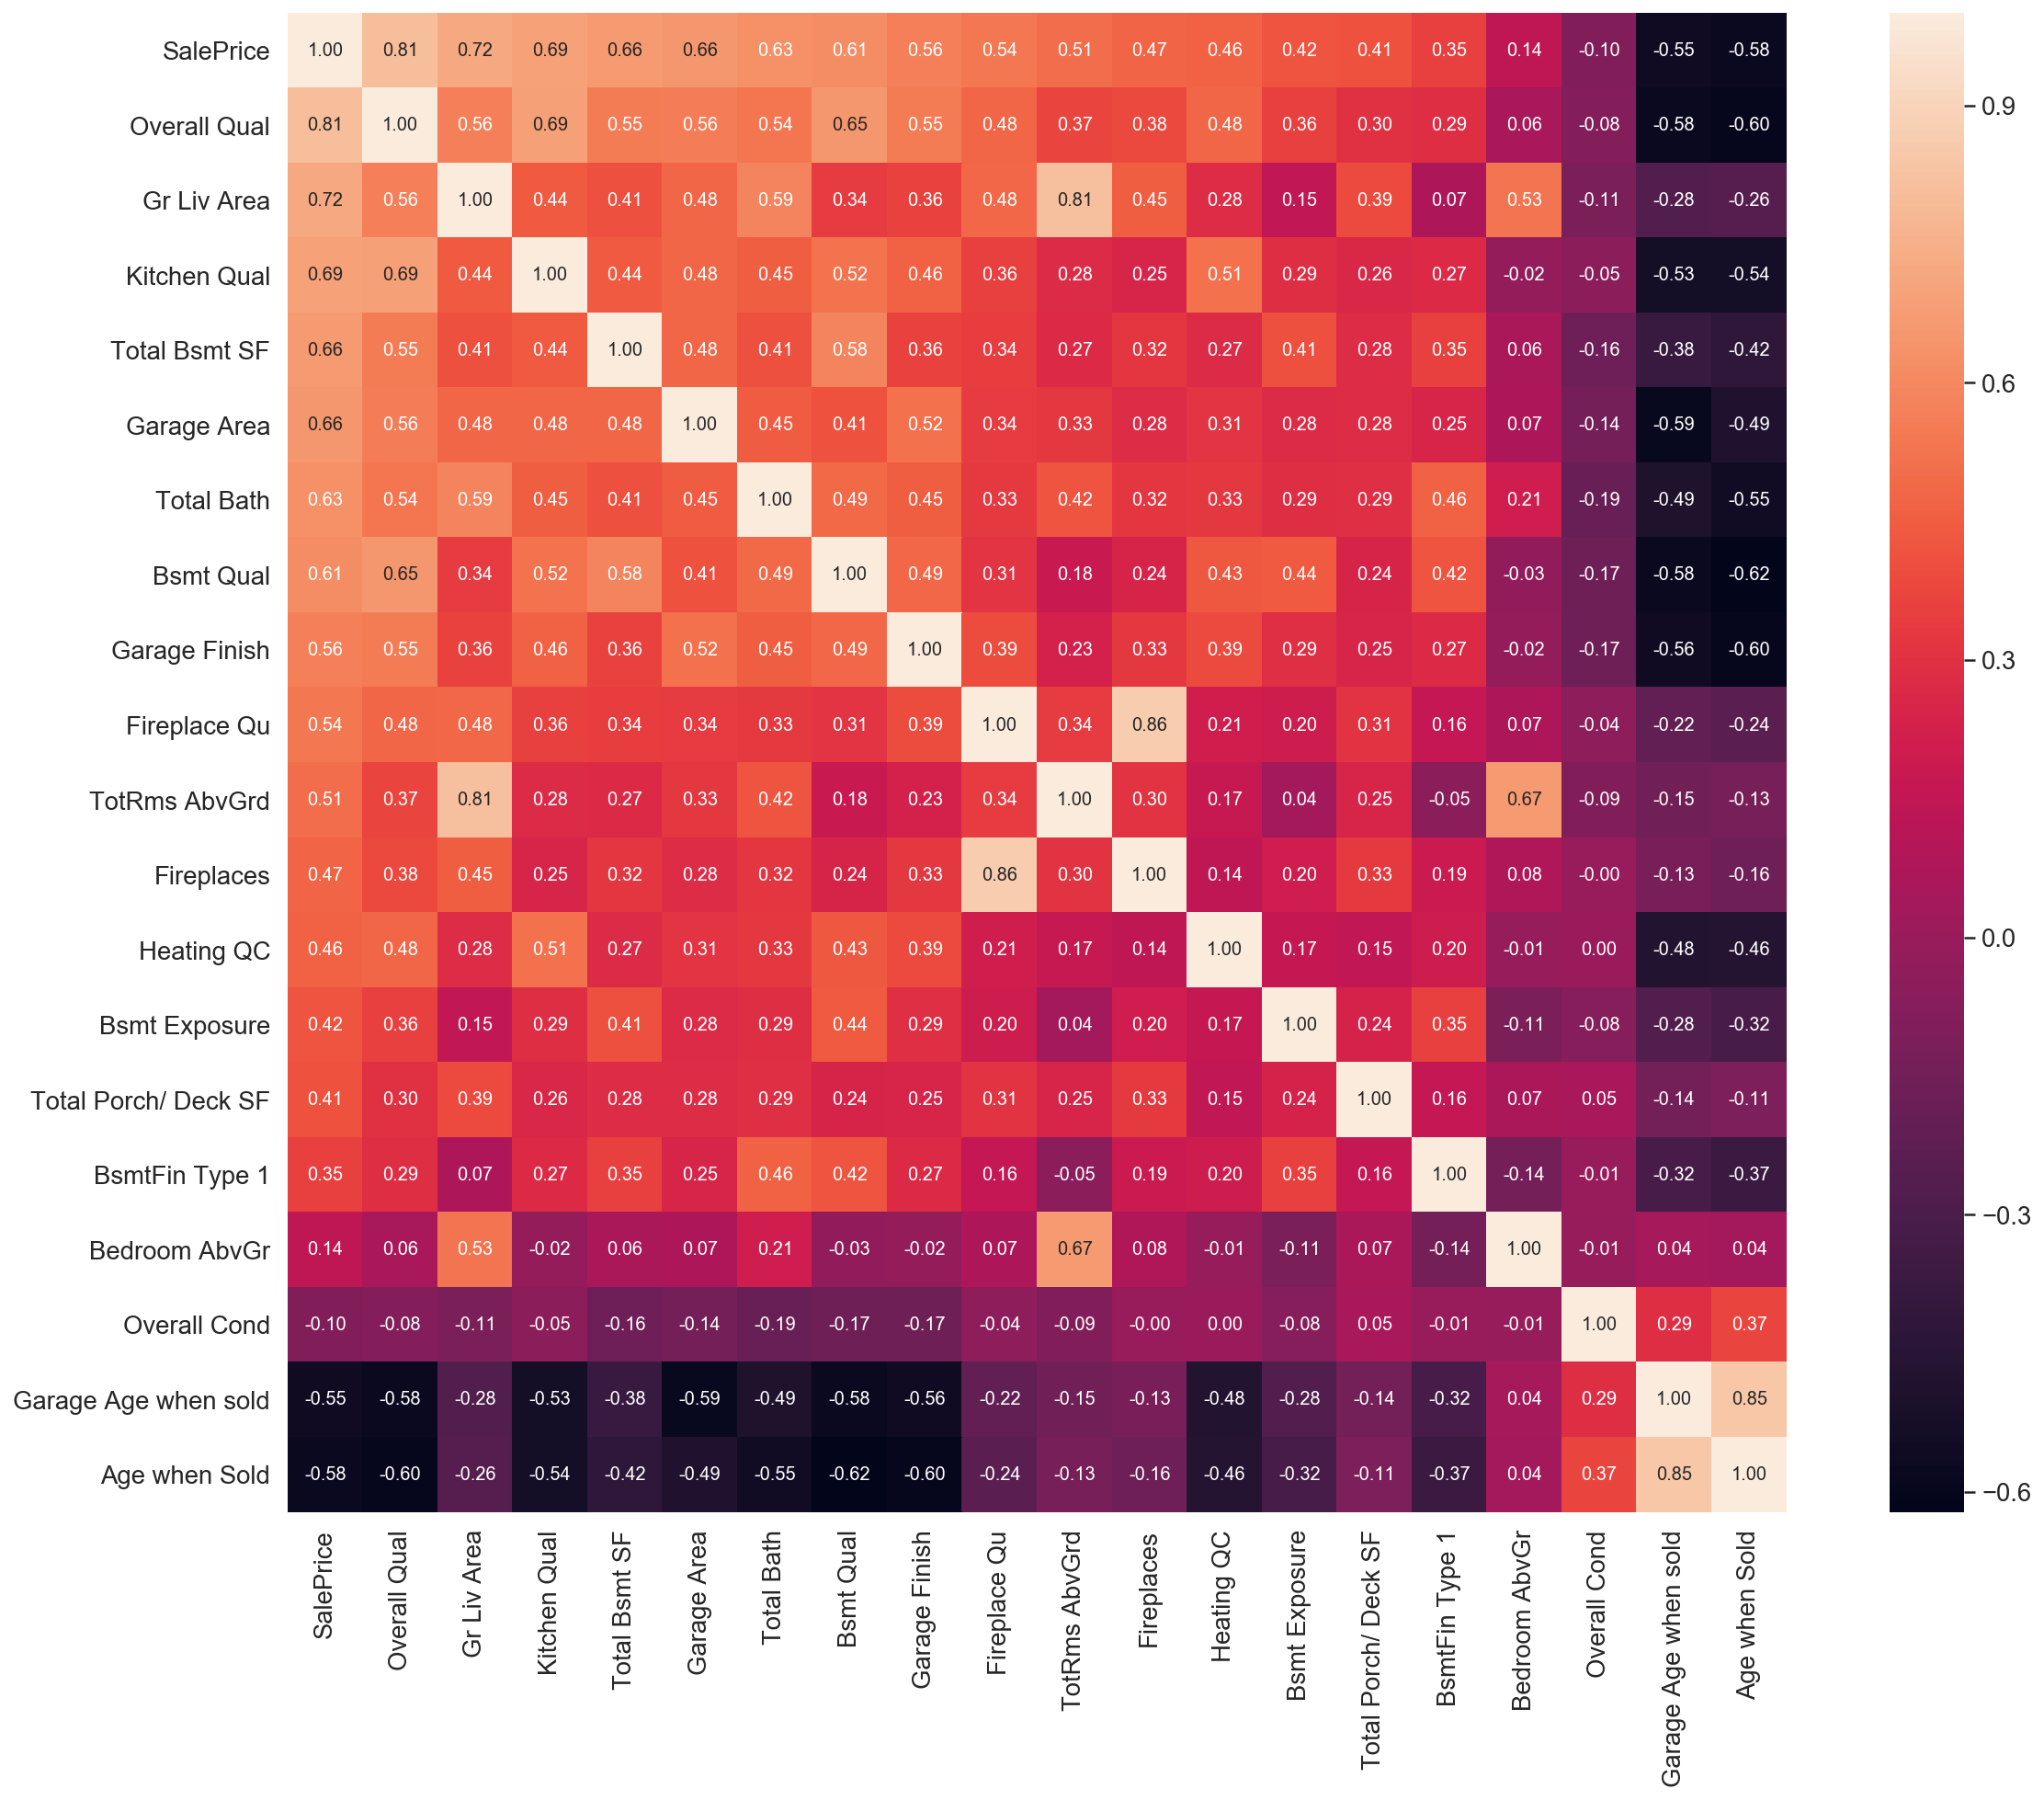

In [106]:
corrmat = df_train_new.corr()
plt.figure(figsize=(20,15))
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train_new[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [107]:
df_train_new.drop(columns =['TotRms AbvGrd', 'Garage Age when sold', 'Fireplaces'], inplace=True)
df_train_new.shape

(2040, 25)

In [108]:
df_test_new.drop(columns =['TotRms AbvGrd', 'Garage Age when sold','Fireplaces'], inplace=True)
df_test_new.shape

(879, 24)

In [109]:
df_train_new.corr()['SalePrice'].sort_values()

Age when Sold          -0.576192
Overall Cond           -0.095558
Bedroom AbvGr           0.139172
BsmtFin Type 1          0.352511
Total Porch/ Deck SF    0.412791
Bsmt Exposure           0.420482
Heating QC              0.463316
Fireplace Qu            0.541203
Garage Finish           0.563830
Bsmt Qual               0.613713
Total Bath              0.631504
Garage Area             0.655470
Total Bsmt SF           0.664688
Kitchen Qual            0.693911
Gr Liv Area             0.718048
Overall Qual            0.805797
SalePrice               1.000000
Name: SalePrice, dtype: float64

We can see a good linear relation between Overall Qual and SalePrice

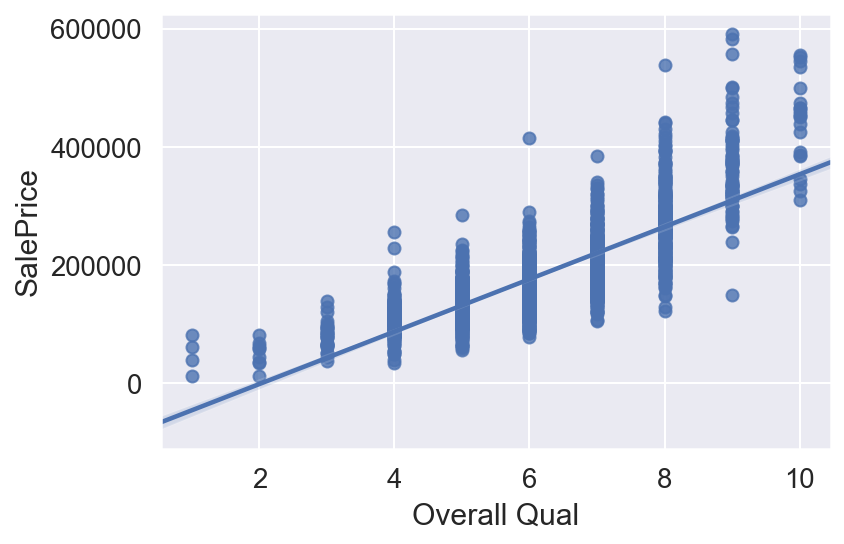

In [110]:
sns.regplot(x='Overall Qual', y = 'SalePrice', data  =df_train_new);

#### One hot encoding/ getting dummy variables

In [111]:
cat = [x for x in df_train_new if df_train_new[x].dtype=='object']
cat 

['MS SubClass',
 'Neighborhood',
 'House Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Garage Type',
 'Remodeled Y/N']

In [112]:
cat_test = [x for x in df_test_new if df_test_new[x].dtype=='object']
cat_test

['MS SubClass',
 'Neighborhood',
 'House Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Garage Type',
 'Remodeled Y/N']

In [113]:
df_train_dummies = pd.get_dummies(df_train_new, columns=cat) 
df_test_dummies = pd.get_dummies(df_test_new, columns=cat_test)

We have 7 columns missing in df_test_dummies

In [114]:
print(df_train_dummies.shape)
print(df_test_dummies.shape)

(2040, 114)
(879, 109)


In [115]:
for i in df_train_dummies:
    if i not in df_test_dummies:
        print(i)

SalePrice
MS SubClass_150
Neighborhood_GrnHill
Neighborhood_Landmrk
Exterior 1st_CBlock
Exterior 1st_ImStucc
Exterior 1st_Stone
Exterior 2nd_Stone


In [116]:
df_train_dummies.drop(columns=['MS SubClass_150', 'Neighborhood_GrnHill', 'Neighborhood_Landmrk',
                               'Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone', 'Exterior 2nd_Stone'], 
                      inplace=True)

In [117]:
df_train_dummies.shape

(2040, 107)

We will have to remove the 4 extra columns in  df_test_dummies

In [118]:
for i in df_test_dummies:
    if i not in df_train_dummies:
        print(i)

Exterior 1st_PreCast
Exterior 2nd_Other
Exterior 2nd_PreCast


In [119]:
for i in df_test_dummies:
    if i not in df_train_dummies:
        df_test_dummies.drop(columns=i, inplace=True)        


In [120]:
print(df_test_dummies.shape)

(879, 106)


### Modeling and feature engineering

In [121]:
features = [col for col in df_train_dummies.columns.tolist() if col != 'SalePrice']

In [122]:
X = df_train_dummies[features]
y = df_train_dummies['SalePrice']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [124]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#### Baseline (Linear Regression)

In [125]:
lr = LinearRegression()

In [126]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
print('Baseline Score:', (cross_val_score(lr,X_train_scaled,y_train,cv=10)).mean())
print('Validation score:', lr.score(X_test_scaled, y_test))

Baseline Score: -3.8122570405504195e+20
Validation score: -4.168073088627392e+16


The Linear Regression on X_test_scaled is performing very badly as it is overfitted. We will perform regularisation on these data with Ridge, Lasso and ElasticNet models.

#### Ridge model

In [169]:
alpha_num = np.logspace(-4, 4, 200)
ridge_model = RidgeCV(alphas=alpha_num, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_scaled, y_train)
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha 

1.1489510001873087

In [173]:
ridge = Ridge(alpha=ridge_optimal_alpha)
ridge.fit(X_train_scaled, y_train)
print('Training set Score:', (cross_val_score(ridge,X_train_scaled,y_train,cv=10)).mean())
print('Validation score:', ridge.score(X_test_scaled, y_test))

Training set Score: 0.8853004253523797
Validation score: 0.9027292081688759


In [174]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [175]:
np.sqrt(mean_squared_error(y_test, y_pred_ridge))

23013.230854316425

The residuals looks quite like that are evenly distributed on both side of the 'red line' - residual = 0.

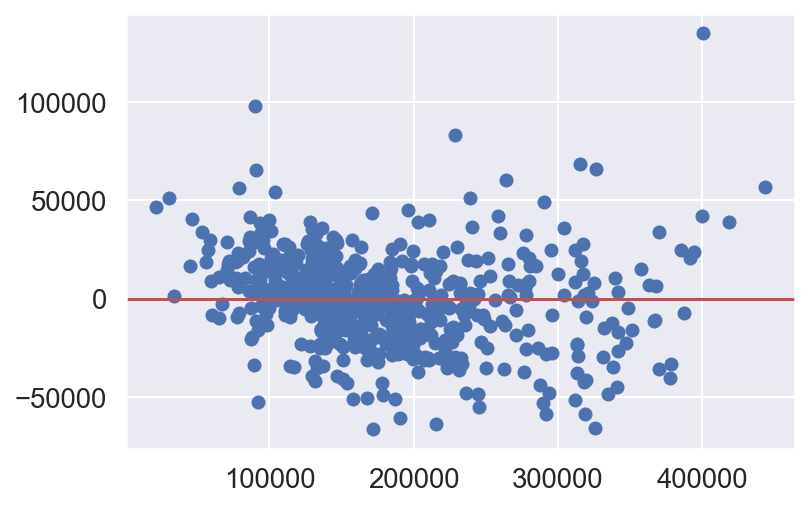

In [176]:
residuals_ridge = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals_ridge)
plt.axhline(0, color='r');

#### Lasso Model

In [177]:
l_alphas = alpha_num
lasso_model = LassoCV(alphas=l_alphas, cv=10)
lasso_model = lasso_model.fit(X_train_scaled, y_train)
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha 

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997359010.5543213, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1180538630.5390625, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1248270069.3919678, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2176017671.7507324, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2175122867.951416, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2174306638.5876465, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2166021674.3085938, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2166005505.689453, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2165992961.9091797, tolerance: 843911542.6570982
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1414795659.6346436, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1393369765.2877197, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367027652.1557617, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2167757937.8778076, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2263391627.369873, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2287083517.0247803, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2286676610.088379, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2286654298.2578125, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2286634140.265869, tolerance: 838621463.3457566
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965500942.173584, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1201649002.9754639, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282219311.9776611, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2174524911.7910156, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2172850960.9882812, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2171322558.8898926, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2155700144.352783, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2155675525.786133, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2155656000.493164, tolerance: 813549278.6545973
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You migh

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868427538.7182617, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 940745783.9034424, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 942060511.1621094, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You migh

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2129455814.194336, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2128330160.7529297, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2127302923.7607422, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2116883185.2279053, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2116862282.605957, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2116845901.3588867, tolerance: 841022345.6868585
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061232569.4489746, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236232149.3291016, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1259504435.4835205, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1960563779.8659668, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1959578787.2844238, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1958680261.529541, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949541909.0909424, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949526910.0908203, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949514647.5836182, tolerance: 812245436.3700143
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106904171.097168, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165780928.2299805, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162419399.2751465, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1977226485.1574707, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1976631350.4125977, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1976088521.5291748, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970548724.1533203, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970547251.1392822, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970537897.0761719, tolerance: 809701592.2971298
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2537703191.7890625, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2534455433.592041, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2545546751.071289, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2219206246.4874268, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2218591532.6013184, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2218030754.3658447, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2212331865.6968994, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2212323044.3554688, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2212314321.711426, tolerance: 832383506.2110813
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1722918922.732666, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1978972584.5081787, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2033677836.380005, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2091775103.4221191, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2091437917.473877, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2091130741.334961, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2088050095.7683105, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2088039845.0722656, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2088030533.9589844, tolerance: 807431597.2899622
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1987854631.4355469, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2324974192.996582, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2392150574.6380615, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2362150447.895508, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2361495313.647949, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2360897774.3137207, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2354827610.2702637, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2354816190.7753906, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2354808526.717041, tolerance: 818343902.9913801
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

246.5811075822604

In [178]:
lasso = Lasso(alpha=lasso_optimal_alpha)
lasso.fit(X_train_scaled, y_train)
print('Training set Score:', (cross_val_score(lasso,X_train_scaled,y_train,cv=10)).mean())
print('Validation score:', lasso.score(X_test_scaled, y_test))


Training set Score: 0.8859967291553048
Validation score: 0.9097553562229101


In [179]:
y_pred_lasso = lasso.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

22166.497995334335

We can see that not many of our coefficients were made 0

C:\Users\cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


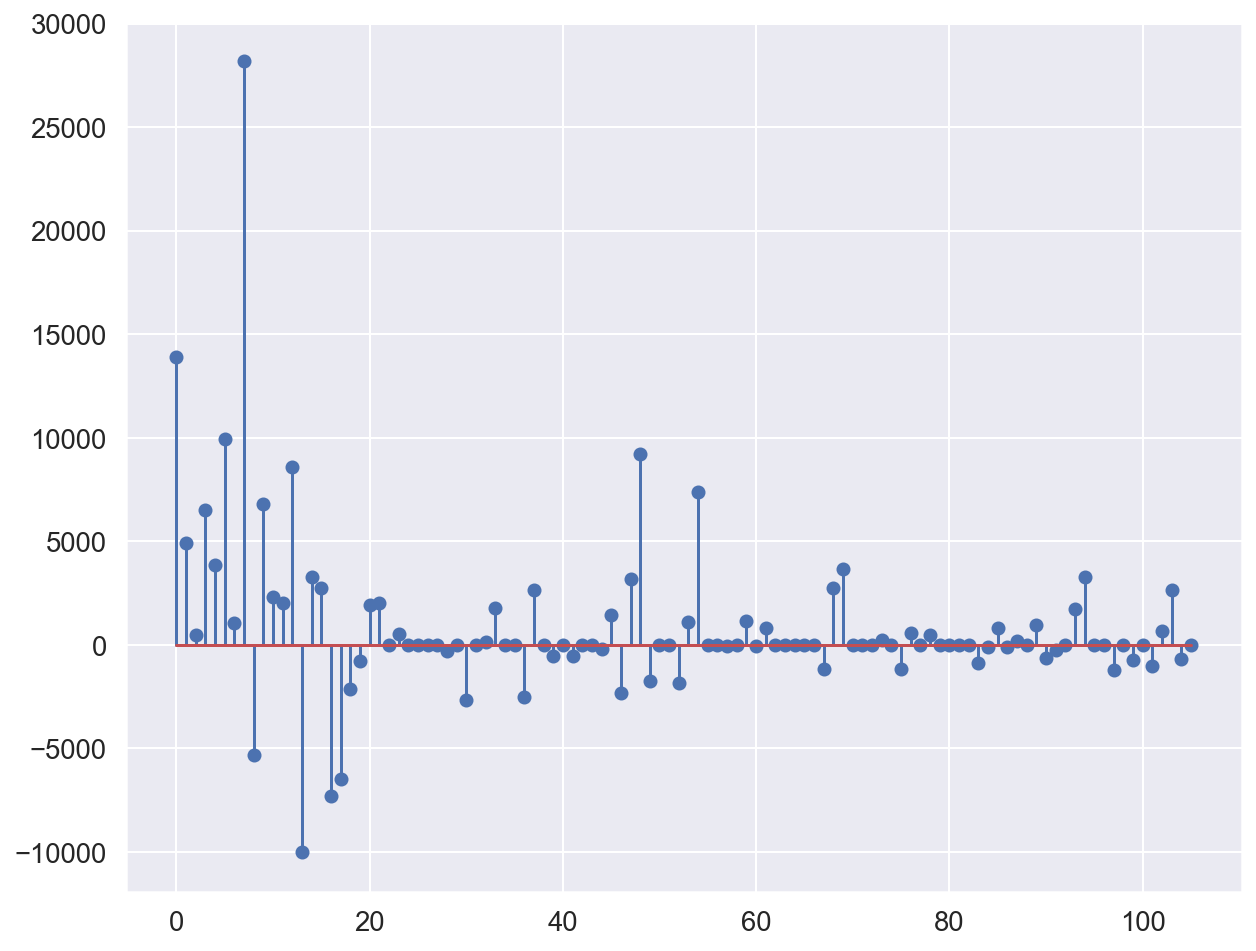

In [180]:
plt.figure(figsize = (10,8))
plt.stem(lasso.coef_);

#### Elastic Net Model

In [191]:
elasticnet = ElasticNetCV(alphas=alpha_num, l1_ratio=0.5, cv=5)
enet_model = elasticnet.fit(X_train_scaled, y_train)
enet_optimal_alpha = enet_model.alpha_
enet_optimal_alpha

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1382687787.401245, tolerance: 768190154.2573564
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5592013388.810913, tolerance: 768190154.2573564
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18026502491.777588, tolerance: 768190154.2573564
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355524968194.6418, tolerance: 768190154.2573564
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355496880324.5451, tolerance: 768190154.2573564
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355470888820.07666, tolerance: 768190154.2573564
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338247564591.56067, tolerance: 709330223.1750873
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338357361668.815, tolerance: 709330223.1750873
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338455651221.2166, tolerance: 709330223.1750873
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You migh

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323960756896.82996, tolerance: 739143746.6976155
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323973580530.18256, tolerance: 739143746.6976155
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323968345112.52527, tolerance: 739143746.6976155
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324303496936.4024, tolerance: 728520518.8971717
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324234435219.18225, tolerance: 728520518.8971717
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324152139593.59955, tolerance: 728520518.8971717
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234196981917.08826, tolerance: 710920524.8674338
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267087173372.373, tolerance: 710920524.8674338
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290925356366.63995, tolerance: 710920524.8674338
  tol, rng, random, positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mig

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438310624052.98193, tolerance: 914160892.3877665
  positive)


0.001011637979766207

In [192]:
elanet = ElasticNet(alpha=enet_optimal_alpha)
elanet.fit(X_train_scaled, y_train)
print('Training set score:', (cross_val_score(elanet,X_train_scaled,y_train,cv=10)).mean())
print('Validation score:', elanet.score(X_test_scaled, y_test))

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438310624052.98193, tolerance: 914160892.3877665
  positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399485584977.3539, tolerance: 843911542.6570982
  positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397341164652.3617, tolerance: 838621463.3457566
  positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Training set score: 0.8853612696749258
Validation score: 0.9023206311322587


C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390631059613.67126, tolerance: 832383506.2110813
  positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393772567060.0881, tolerance: 807431597.2899622
  positive)
C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403578699905.2582, tolerance: 818343902.9913801
  positive)


In [195]:
y_pred_enet = elanet.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred_enet))

23061.512688976487

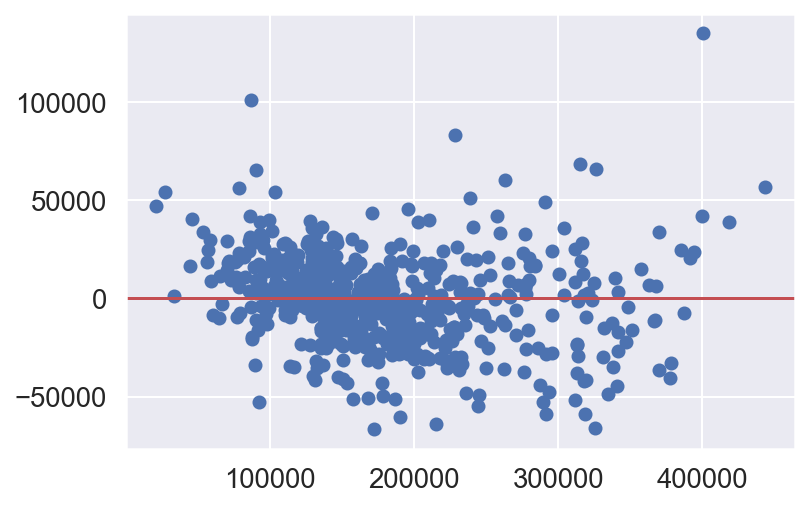

In [196]:
residuals_enet = y_test - y_pred_enet
plt.scatter(y_pred_enet, residuals_enet)
plt.axhline(0, color='r');

Elastic Net seems like the best model with the most optimum R^2 score of ~0.90976 (106 features) and lest RMSE of ~ 22166.497
However we have too many features inside the model, we will perform feature engineering to minimize the features.
- After running the below code for a few times, the optimum number of features is 26 with the highest score of 0.877719 (to eliminate to less than 30 features)

In [187]:
nof_list=np.arange(1,30)            
high_score=0
nof=0           
score_list =[]
cols = list(X.columns)
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_test_rfe = rfe.transform(X_test_scaled)
    
    model.fit(X_train_rfe,y_train)

    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        temp = pd.Series(rfe.support_,index = cols)
        selected_features_rfe = temp[temp==True].index
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(selected_features_rfe)


Optimum number of features: 26
Score with 26 features: 0.877719
Index(['Overall Qual', 'Overall Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen Qual',
       'Garage Area', 'Age when Sold', 'Total Bath', 'MS SubClass_20',
       'MS SubClass_30', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_NWAmes',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'House Style_2Story',
       'Exterior 1st_CemntBd', 'Exterior 2nd_CmentBd', 'Foundation_Slab',
       'Garage Type_No Garage'],
      dtype='object')


We can do a quick comparison with our continuous & ordinal data heatmap to check if the output makes sense

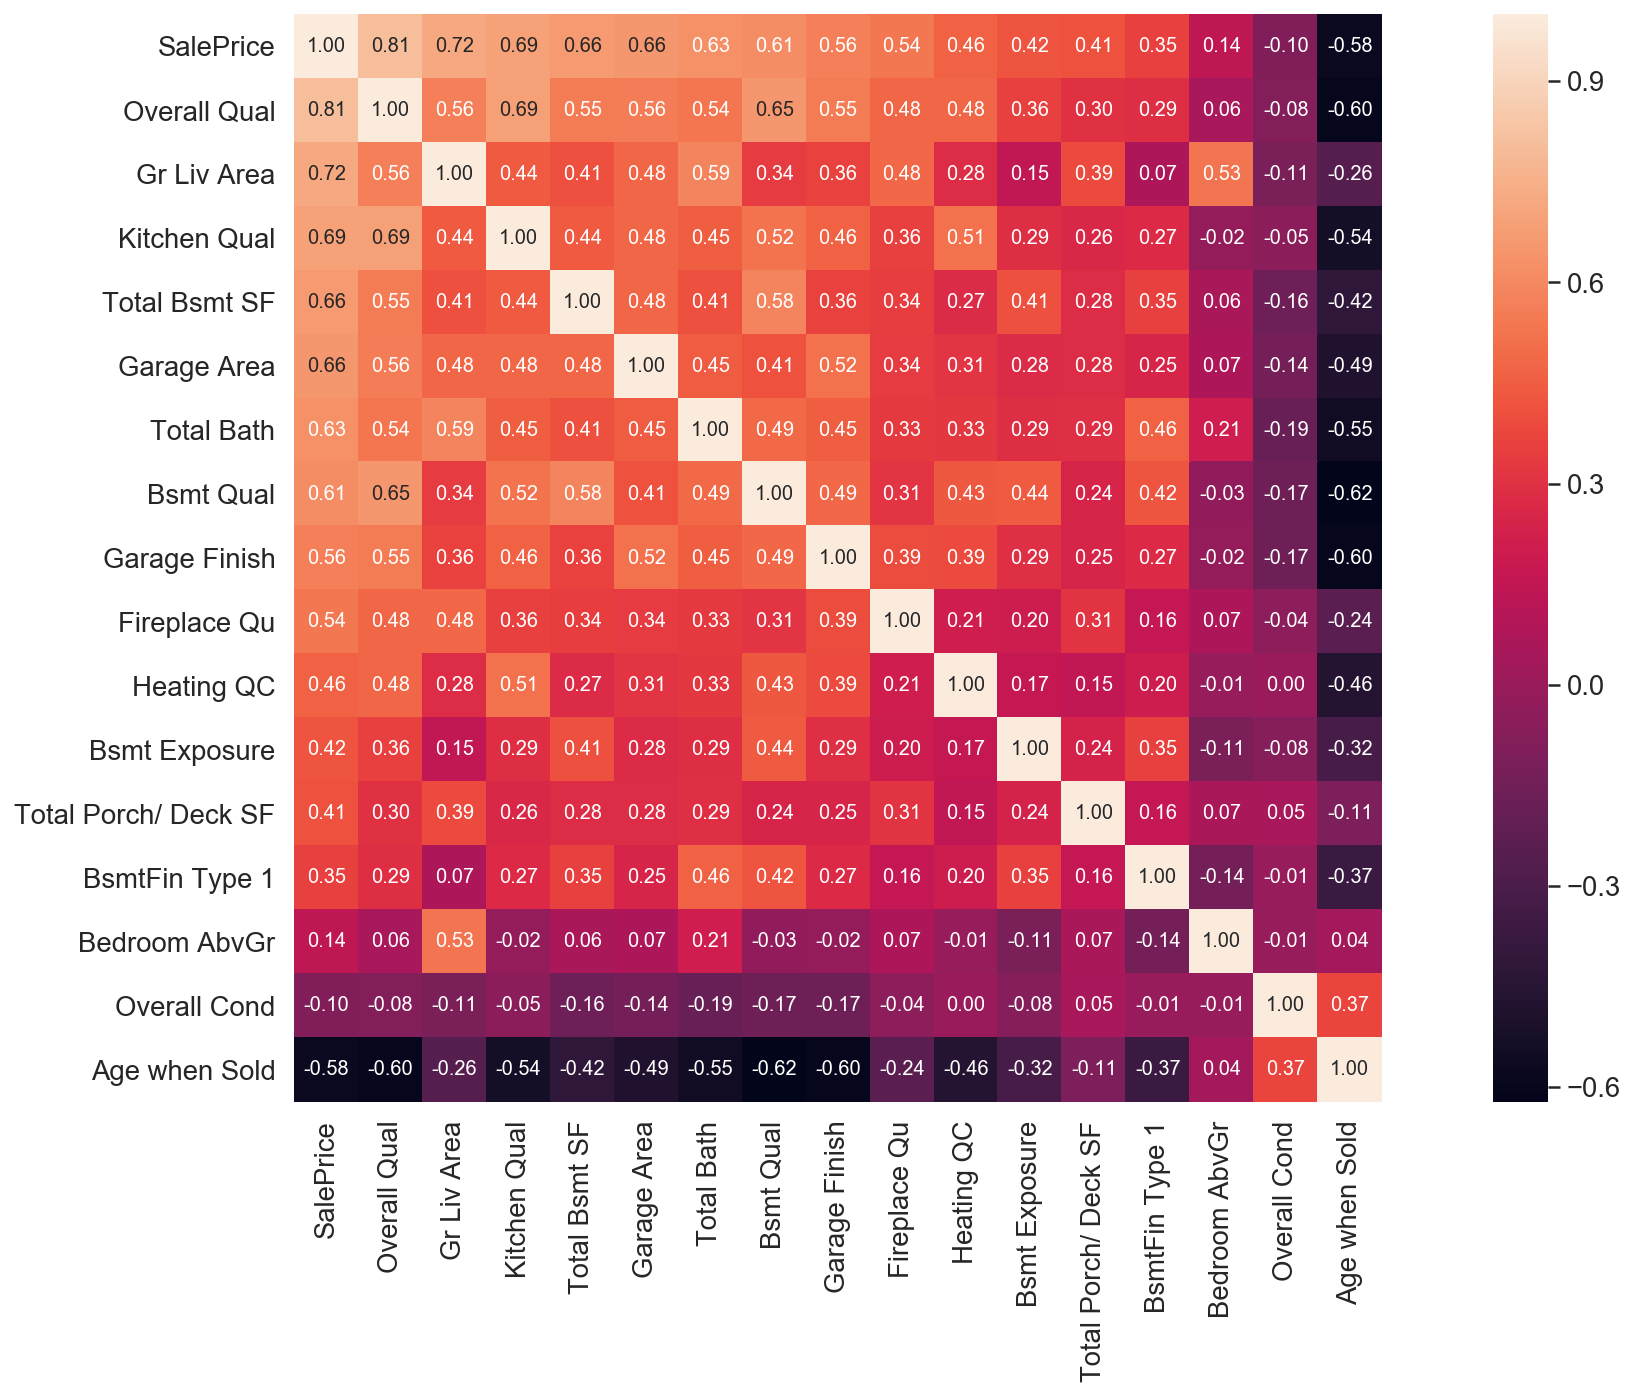

In [188]:
corrmat = df_train_new.corr()
plt.figure(figsize=(20,10))
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train_new[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Since it looks very close to what our heatmap has plotted, we will create a new features column and we can perform Linear Regression model on these features.

### Modeling selection and evaluating models 

In [206]:
features_to_keep = ['Overall Qual', 'Overall Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen Qual',
       'Garage Area', 'Age when Sold', 'Total Bath', 'MS SubClass_20',
       'MS SubClass_30', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_NWAmes',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'House Style_2Story',
       'Exterior 1st_CemntBd', 'Exterior 2nd_CmentBd', 'Foundation_Slab',
       'Garage Type_No Garage', 'SalePrice']

In [207]:
features_to_drop = [col for col in df_train_dummies.columns if col not in features_to_keep]

In [208]:
X_new = X.drop(columns = features_to_drop)
X_new.shape

(2040, 26)

In [209]:
df_test_cleaned = df_test_dummies.drop(columns = features_to_drop)

In [210]:
print(X_new.shape)
df_test_cleaned.shape

(2040, 26)


(879, 26)

We should check the collinear relation between each features before fitting it into our model

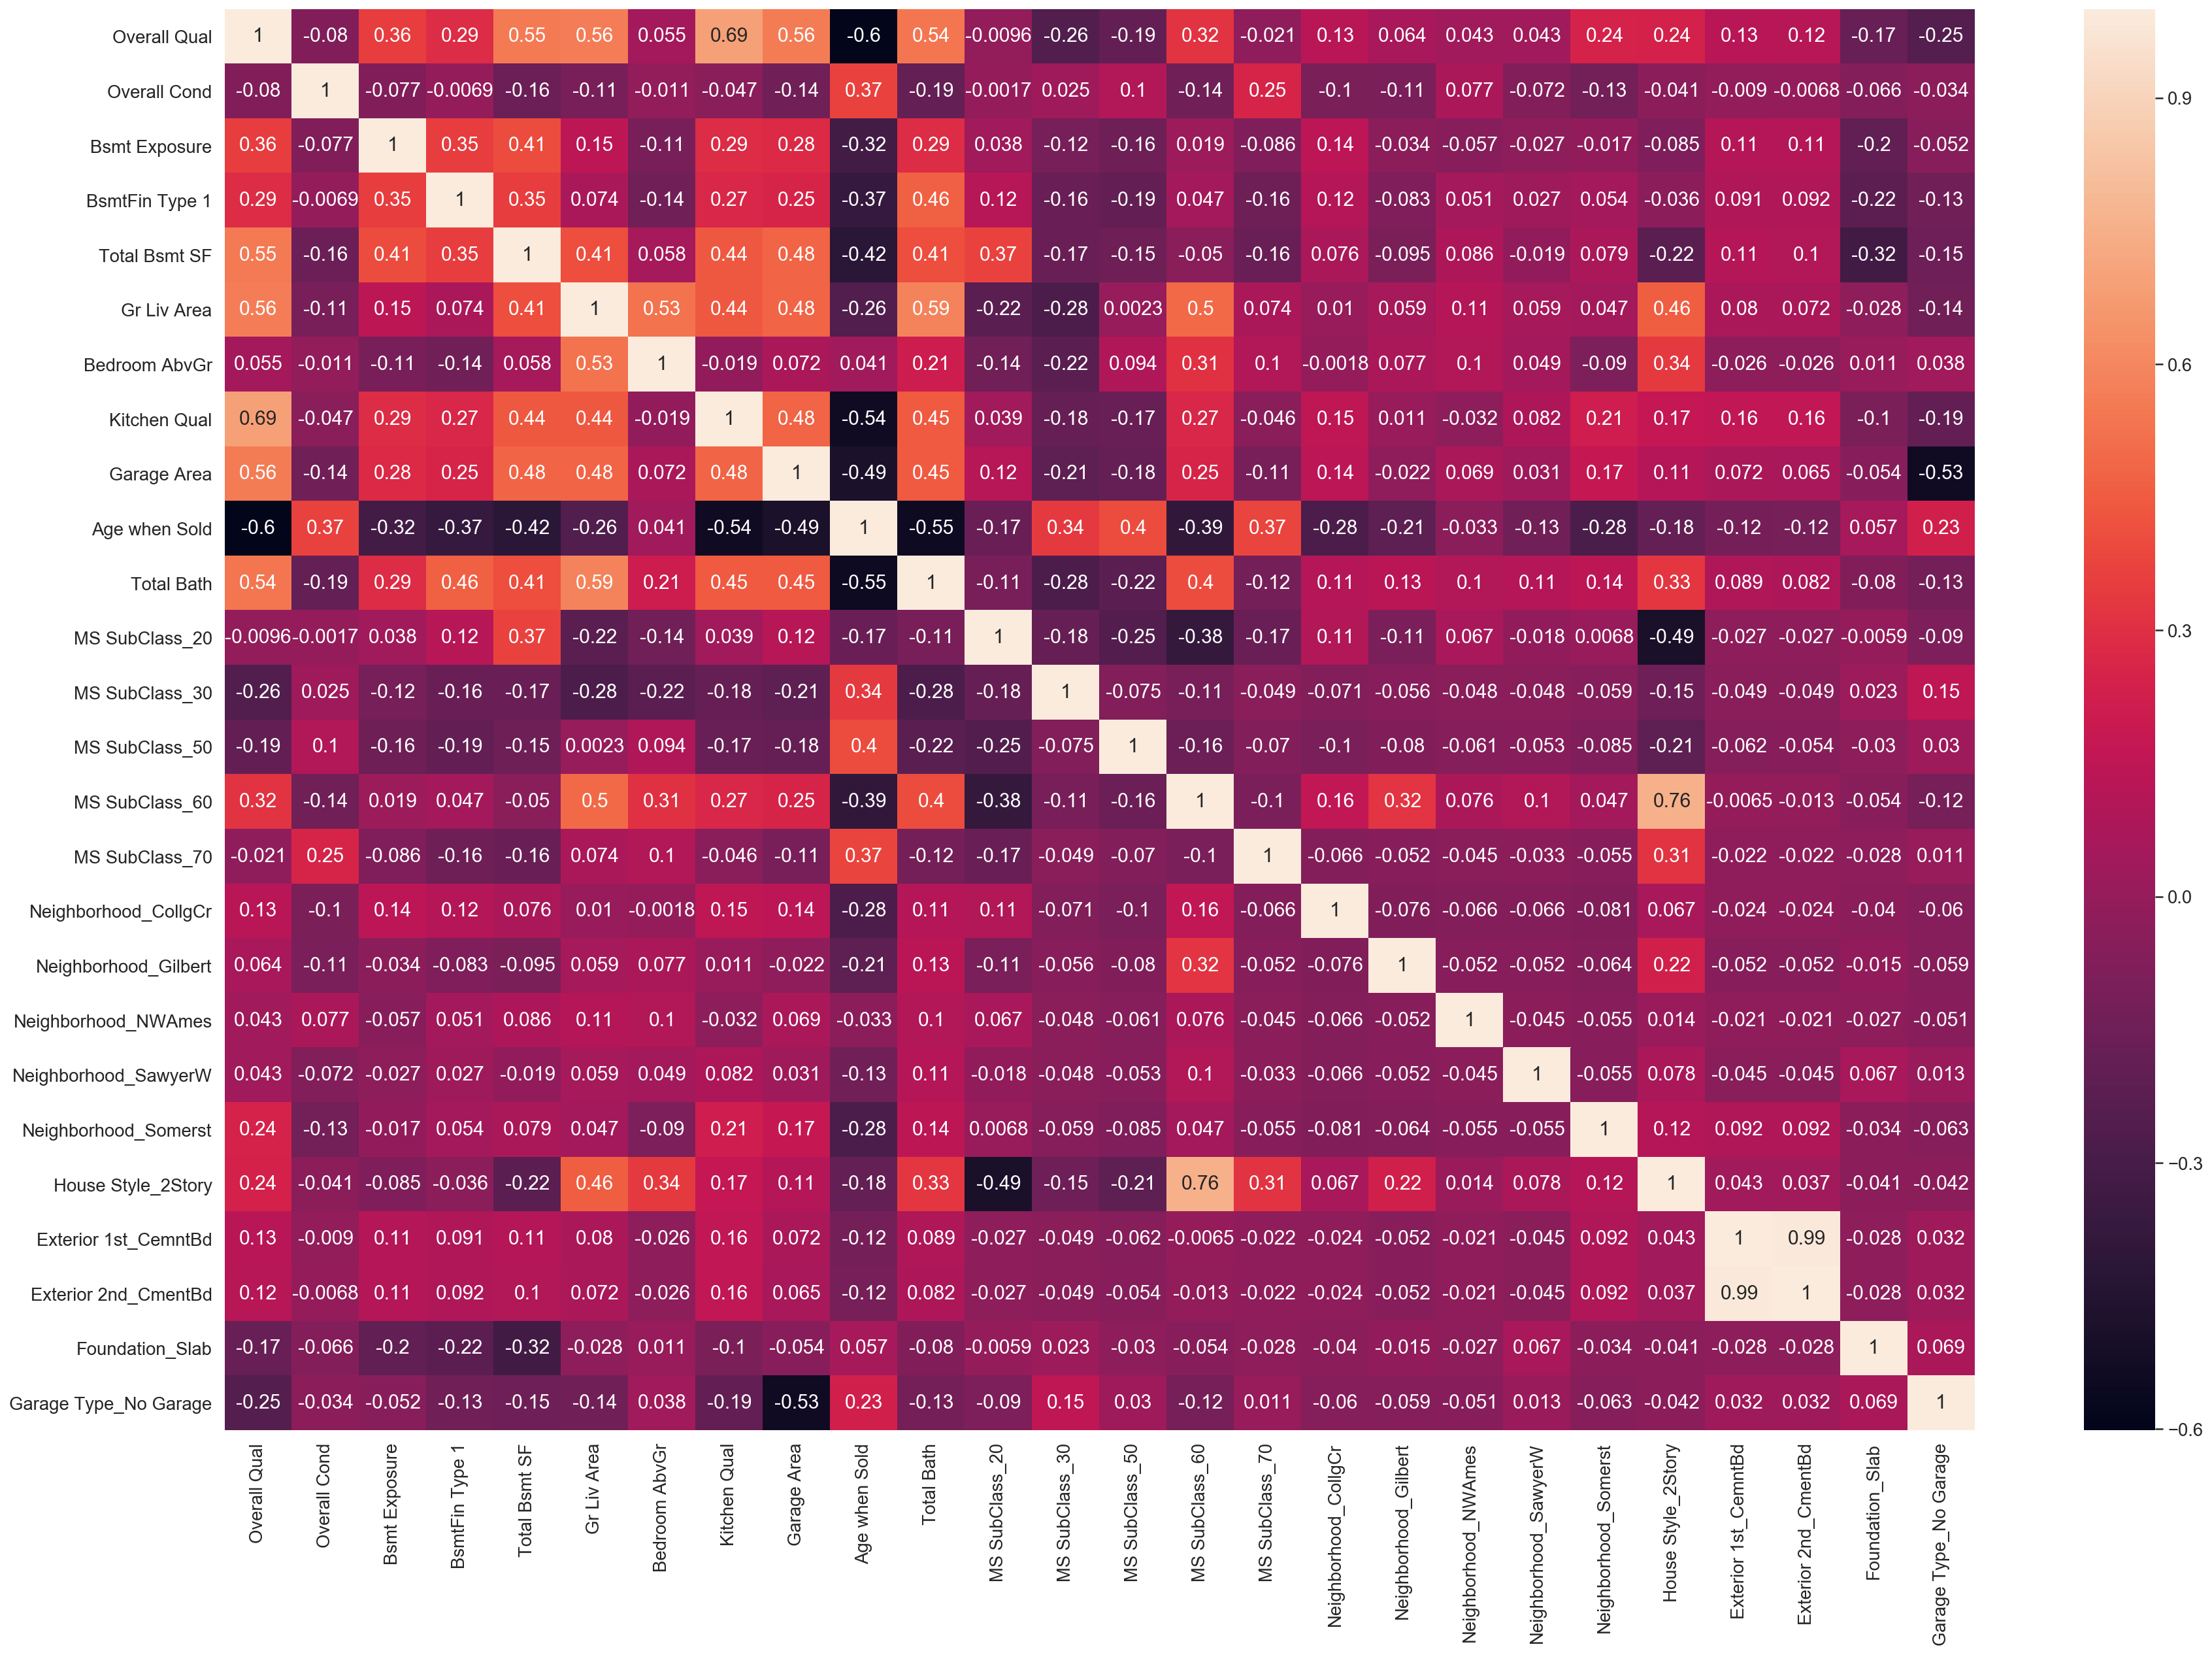

In [211]:
plt.figure(figsize=(30,20))
sns.heatmap(X_new.corr(), annot=True);

We will drop Exterior 2nd_CmentBd as it is highly correlated with Exterior 1st_CmentBd

In [212]:
X_new.drop(columns='Exterior 2nd_CmentBd', inplace=True)

In [213]:
df_test_cleaned.drop(columns='Exterior 2nd_CmentBd', inplace=True)

In [214]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.25, random_state=42)

In [215]:
test_features = [col for col in df_test_cleaned.columns.tolist() if col == col]
test = df_test_cleaned[test_features]
test.shape

(879, 25)

In [241]:
ss_new = StandardScaler()
ss_new.fit(X_train_new)
X_train_new_scaled = ss_new.transform(X_train_new)
X_test_new_scaled = ss_new.transform(X_test_new)
test_scaled = ss_new.transform(test)

In [242]:
lr1 = LinearRegression()
lr1.fit(X_train_new_scaled, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
print(f'Baseline R^2 score: {lr1.score(X_train_new_scaled, y_train_new)}')
print(f'Validation R^2 score: {lr1.score(X_test_new_scaled, y_test_new)}')

Baseline R^2 score: 0.8809778182974338
Validation R^2 score: 0.8804408288982766


R^2 score for ElasticNet (with 106 features): ~0.90976   
R^2 score for Linear Regression (with 26 features): ~0.88044   
- We have a very similar R^2 score for both the models but we will **select our Linear Regression model** as it contains much lesser features
- As the model is not overfitted, we will not perform regularization method on it

In [244]:
y_pred_lr = lr.predict(test_scaled)
y_pred_lr.shape

(879,)

In [245]:
columns = ['SalePrice']
y_pred_lr_df = pd.DataFrame(data=y_pred_lr,columns=columns)


In [246]:
y_pred_lr_df['Id'] = df_test['Id']

In [247]:
y_col = y_pred_lr_df.columns.tolist()
y_col = y_col[-1:] + y_col[:-1]
y_pred_lr_df = y_pred_lr_df[y_col]

In [248]:
y_pred_lr_df.to_csv('./datasets/Y_pred.csv', index=False)

### After submitting to Kaggle, the RMSE was 29048.25016

## Business Recommendations

In [269]:
features_to_drop = [col for col in df_train_dummies.columns if col not in features_to_keep]
df_train_evaluation = df_train_dummies.drop(columns = features_to_drop)

In [271]:
df_train_evaluation2 = df_train_evaluation.drop(columns=['Exterior 2nd_CmentBd', 'SalePrice'])

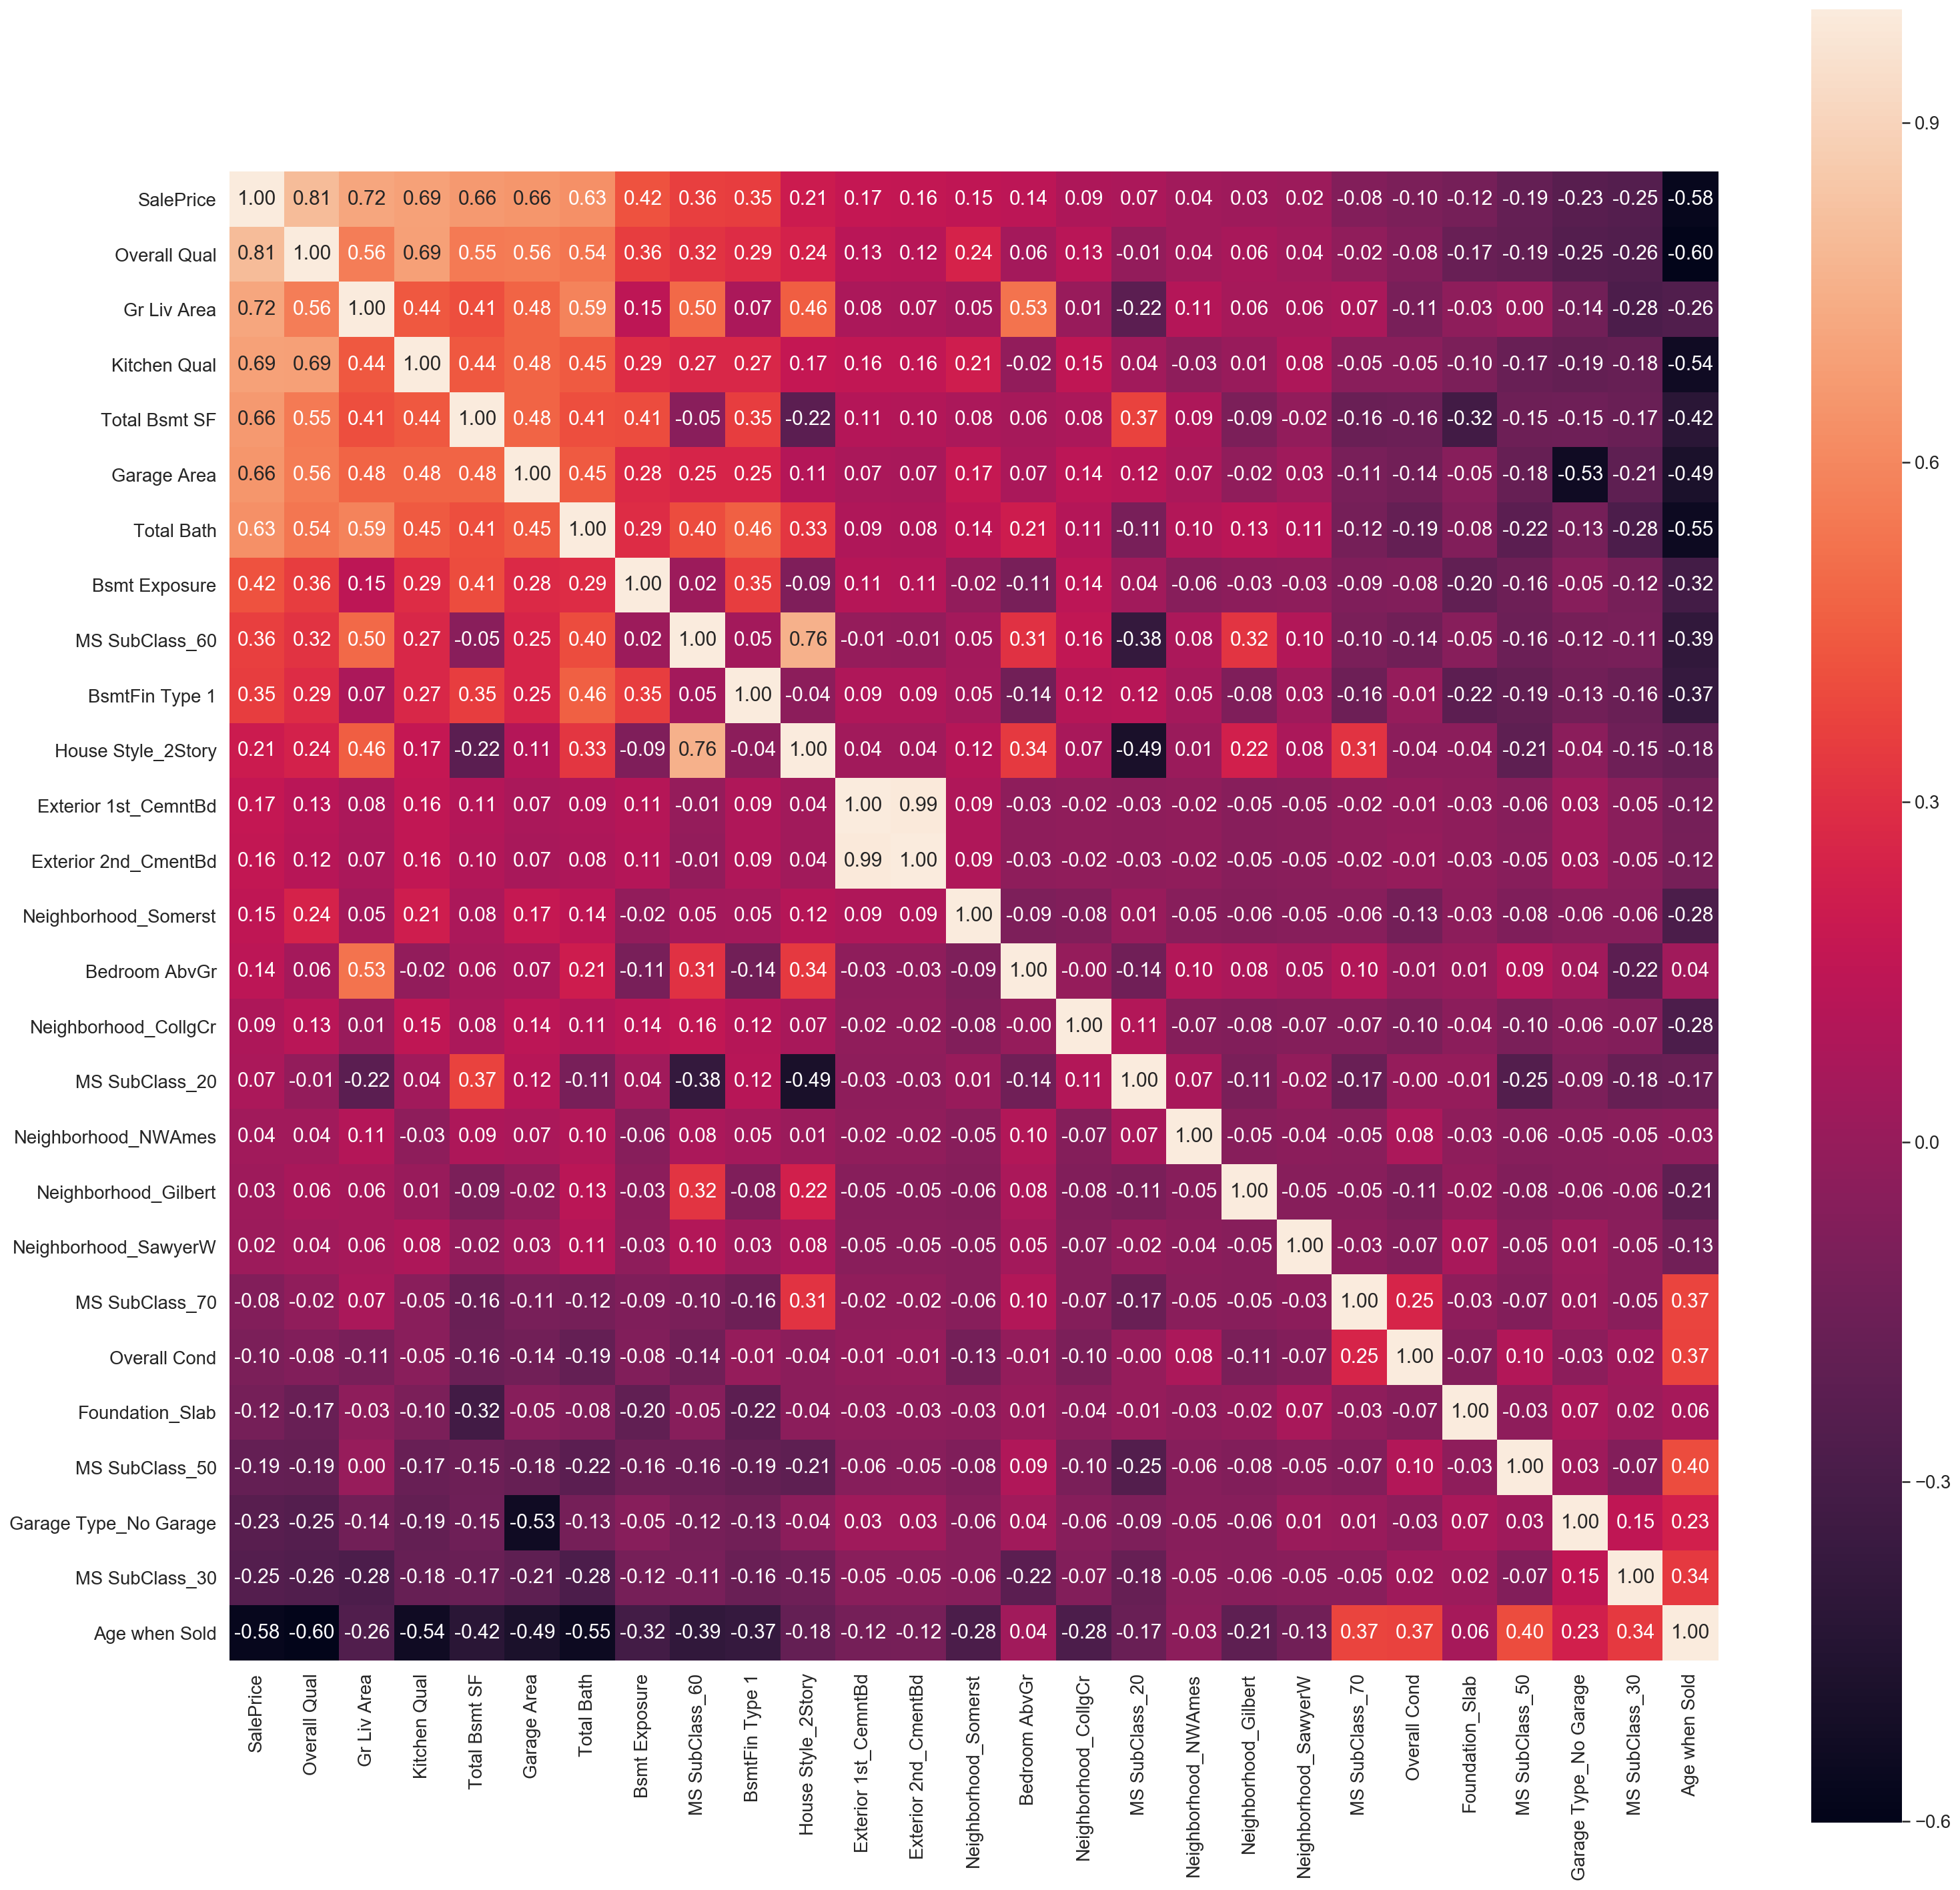

In [273]:
corrmat = final_train_df.corr()
plt.figure(figsize=(25,25))
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(final_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [277]:
df_train_evaluation.corr()['SalePrice'].sort_values()

Age when Sold           -0.576192
MS SubClass_30          -0.250681
Garage Type_No Garage   -0.232752
MS SubClass_50          -0.185121
Foundation_Slab         -0.119903
Overall Cond            -0.095558
MS SubClass_70          -0.075003
Neighborhood_SawyerW     0.018647
Neighborhood_Gilbert     0.026302
Neighborhood_NWAmes      0.037154
MS SubClass_20           0.074482
Neighborhood_CollgCr     0.086095
Bedroom AbvGr            0.139172
Neighborhood_Somerst     0.153602
Exterior 2nd_CmentBd     0.161968
Exterior 1st_CemntBd     0.172706
House Style_2Story       0.205174
BsmtFin Type 1           0.352511
MS SubClass_60           0.359182
Bsmt Exposure            0.420482
Total Bath               0.631504
Garage Area              0.655470
Total Bsmt SF            0.664688
Kitchen Qual             0.693911
Gr Liv Area              0.718048
Overall Qual             0.805797
SalePrice                1.000000
Name: SalePrice, dtype: float64

In [276]:
cdf = pd.DataFrame(lr1.coef_, df_train_evaluation2.columns, columns=['Coefficients'])
print(cdf)

                       Coefficients
Overall Qual           19004.979429
Overall Cond            6250.155218
Bsmt Exposure           6609.295297
BsmtFin Type 1          4250.852290
Total Bsmt SF          10154.078842
Gr Liv Area            31222.460025
Bedroom AbvGr          -6076.671565
Kitchen Qual            8524.775562
Garage Area             9355.294960
Age when Sold         -13076.438643
Total Bath              4613.766722
MS SubClass_20          9609.086933
MS SubClass_30          6115.925835
MS SubClass_50          4749.771233
MS SubClass_60          9254.314278
MS SubClass_70          4680.917954
Neighborhood_CollgCr   -5623.658135
Neighborhood_Gilbert   -2380.394068
Neighborhood_NWAmes    -3939.177659
Neighborhood_SawyerW   -3872.787881
Neighborhood_Somerst   -2807.359105
House Style_2Story     -4185.799304
Exterior 1st_CemntBd    3154.276725
Foundation_Slab         3277.311831
Garage Type_No Garage   3845.091353


Evaluation of the model and other aspects of the features.
- Overall Qual has the strongest correlation of 0.805797
- Gr Liv Area hurts the value of the home most by 31222.46
- Home owners should improve on their Overall Qual, Overall Condition, Kitchen Qual to increase the value of their home
- Neighborhood not adviced to invest in:
    - College Creek
    - Gilbert
    - Northwest Ames
    - Sawyer West
    - Somerset
- It might generalize to cities that collected similar features as compared to our model
- In order to make it more universal, Neighborhood should not be included in the data we collect as it might restrict to that certain area of the country only.